## Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers
!pip install nltk
!pip install enelvo

!pip install sentencepiece
#!pip install bertopic[all]
!pip install flair
#!pip install bertopic
!pip install -U pandas # upgrade pandas
!pip install swifter # first time installation
!pip install pyspellchecker
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached importlib_metadata-3.10.1-py3-none-any.whl (14 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.12.0
    Uninstalling importlib-metadata-4.12.0:
      Successfully uninstalled importlib-metadata-4.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have nump

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install transformers
!pip install sacremoses

import tensorflow as tf
import pandas as pd
import numpy as np
import pickle
import torch
import nltk
import sys
import ast
import json
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

from matplotlib import rc
from collections import defaultdict
from textwrap import wrap

from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, f1_score, accuracy_score
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from enelvo import normaliser
from tqdm import tqdm, trange
from ast import literal_eval
from transformers import *
from flair.embeddings import TransformerDocumentEmbeddings

#from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups


import swifter
from spellchecker import SpellChecker
from enelvo import normaliser
nltk.download('stopwords')

from torch import nn, optim
from torch.nn import BCEWithLogitsLoss, BCELoss
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from collections import defaultdict

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


device(type='cuda', index=0)

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

## Carregar Dados e Pré-processamento

## Métodos utilitários

In [ ]:
!pip install pyspellchecker
!pip install nltk
!pip install enelvo
!pip install swifter # first time installation
!pip install tweet-preprocessor

!pip install textnets
!python -m spacy download en_core_web_sm pt_core_news_sm

!python -m spacy download  pt_core_news_sm
#!python -m spacy download espacial pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached importlib_metadata-4.12.0-py3-none-any.whl (21 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.1
    Uninstalling importlib-metadata-3.10.1:
      Successfully uninstalled importlib-metadata-3.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.9 MB 101.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.2 MB 496 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:

#Seleciona a linguagem do corretor para português e seleciona o dicionário personalizado.
import unicodedata
import re
import swifter
import preprocessor as preprocessor
from tqdm import tqdm, trange
from spellchecker import SpellChecker

spell = SpellChecker(language='pt')
#spell.word_frequency.load_text_file('palavras.txt')

import nltk
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from array import array
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

# Stemização
from nltk.stem import PorterStemmer
from nltk.stem.rslp import RSLPStemmer
import nltk 
nltk.download('rslp')
ps = PorterStemmer()
rslp = RSLPStemmer()

# Lematizacao
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download("wordnet")
#nltk.download('omw')
nltk.download('omw-1.4')
wnl = WordNetLemmatizer()

import spacy
nlp = spacy.load("en_core_web_sm")

def preprocessorTwitter(sentenca): 
  sentenca = preprocessor.clean(sentenca)
  return sentenca

def remove_stopwords(text):    
  stop_words = set(stopwords.words('portuguese'))
  word_tokens = word_tokenize(text)
  filtered_sentence = [w for w in word_tokens if w not in stop_words] 
  palavra = ''
  for sent in filtered_sentence:
    palavra+= sent + ' ' 
  return palavra

def removePontuacao(sentenca): 
    sentenca = re.sub(u'[^a-zA-ZáéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', r' ',sentenca)
    #sentenca = re.sub(r'[?|!|\'|"|#]',r'',sentenca)
    #sentenca = re.sub(r'[?|!|\'|"]',r'',sentenca)
    #sentenca = re.sub(r'[.|,|)|(|\|/]',r' ',sentenca)
    sentenca = sentenca.replace("\n"," ")
    return sentenca

def removeruidos(sentenca):
    #sentenca = sentenca.replace("username","")
    sentenca = sentenca.replace("hashtag","")
    sentenca = sentenca.replace("retweeet","")
    return sentenca

def corrige_internetes(sentenca):
    norm = normaliser.Normaliser(sanitize = True, capitalize_inis=True, capitalize_pns=True, capitalize_acs=True)
    norm_sentence = norm.normalise(sentenca)
    return norm_sentence

def remove_retweet(sentenca):
    norm = sentenca.split(':')
    if len(norm) >= 2:
      return norm[1]
    else:
      return norm[0]

def deEmojify(sentenca):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',sentenca)

def removerAcentosECaracteresEspeciais(palavra):

    # Unicode normalize transforma um caracter em seu equivalente em latin.
    nfkd = unicodedata.normalize('NFKD', palavra)
    palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])

    # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
    return re.sub('[^a-zA-Z0-9 \\\]', '', palavraSemAcento)

def removerAcentos(palavra):

    # Unicode normalize transforma um caracter em seu equivalente em latin.
    nfkd = unicodedata.normalize('NFKD', palavra)
    palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])

    # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
    return palavraSemAcento

def removerCaracteresEspeciais(palavra):
    # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
    return re.sub('[^a-zA-Z0-9 \\\]', '', palavra)


#Corrige gramaticamente os comentários.
def corretorGramatical(sentenca):
    sentenca_corrigida = ""
    for palavra in sentenca.split():
        palavra_corrigida = spell.correction(palavra)
        sentenca_corrigida += palavra_corrigida
        sentenca_corrigida += " "
    sentenca_corrigida = re.sub(r'\s+', ' ', sentenca_corrigida)
    return sentenca_corrigida

def remove_urls (sentenca):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', sentenca, flags=re.MULTILINE)
    return(vTEXT)

def remove_KKK2(sentenca):
    sentenca_corrigida = sentenca
    for palavra in sentenca.split():
      if palavra.strip().startswith(('kkk')) or palavra.strip().endswith(('kkk')):
        #palavra = ''
        sentenca_corrigida = sentenca.replace(palavra, '').strip()
    return sentenca_corrigida

def word_cloud_text(text):

  cmap = plt.cm.coolwarm

  cloud = WordCloud(
      stopwords=stopwords.words('portuguese'),
      background_color='white',
      colormap=cmap,
      collocations=False,
      width=2500,
      height=1800).generate(" ".join(text))

  return cloud

def plot_cloud_text(cloud, sub, nrows=False, ncols=False, index=False):

  if(nrows):
    plt.subplot(nrows, ncols, index)
    plt.axis('off')
    plt.title(sub, fontsize=20)
    plt.imshow(cloud);
  else:
    plt.axis('off')
    plt.title(sub, fontsize=20)
    plt.imshow(cloud);

def countHashTag(sentenca, limit):
  hash_counts = Counter(re.findall(r'#([a-z0-9]+)', ' '.join(sentenca), re.I))
  return (limitDict(dict(hash_counts), limit))

def countUsers(sentenca, limit):
  users_counts = Counter(re.findall(r'@([a-z0-9]+)', ' '.join(sentenca), re.I))
  #return (dict(sorted(users_counts.items(), key=lambda kv: kv[1], reverse=True)))
  usersDict = limitDict(dict(users_counts), limit)
  return (dict(sorted(usersDict.items(), key=lambda kv: kv[1], reverse=True)))

def limitDict(dictTo, limit):
  newdictTo = dict(sorted(dictTo.items(), key=lambda kv: kv[1], reverse=True))
  controlUser = 0
  dictSelected = {}
  for key, value in newdictTo.items():
    if controlUser <= limit:
      dictSelected[key] = value
    controlUser += 1
  return (dict(sorted(dictSelected.items(), key=lambda kv: kv[1], reverse=True)))

def stemmer(sentenca):
    sentenca_corrigida = ""
    for palavra in sentenca.split():
      sentenca_corrigida += rslp.stem(palavra) + " "
    sentenca_corrigida = sentenca_corrigida.strip()
    return sentenca_corrigida

def lemmer(sentenca):
    sentenca_corrigida = sentenca
    doc = nlp(str(sentenca))
    for token in doc:
      if token.pos_ == 'NOUN':
        palavra = token.text
        sentenca_corrigida = sentenca.replace(palavra, token.lemma_).strip()
    return sentenca_corrigida



# function to return key for any value
def get_key(val, dictionary):
    for key, value in dictionary.items():
         if val == value:
             return key
 
    return "key doesn't exist"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Dataset will be tokenized then split into training and validation sets. The validation set will be used to monitor training. For testing a separate test set will be loaded for analysis.

In [ ]:
#train = '/content/drive/MyDrive/Colab Notebooks/tweets_eleicao_enelvo_raw.csv'
train = '/content/drive/MyDrive/Colab Notebooks/data-science/DataCollection/Twitter/hashtags/LulaNoPrimeiroTurno_rotulado.csv'

df = pd.read_csv(train)

In [ ]:
df = df.rename(columns={'content': 'comment_text'})
df = df[df['comment_text'].notna()]
#df = df.drop(['Unnamed: 0'], axis=1)
#df = df.drop(['Unnamed: 0.1'], axis=1)
df = df.dropna(subset=['sentiment', 'comment_text'])
df = df.drop(df[df.sentiment == 'brasil'].index)
#df = df.dropna()
df.head()

,displayname,username,verified,created,favorite_count,location,followersCount,friendsCount,profileImageUrl,url,id,date,retweetCount,replyCount,likeCount,quoteCount,comment_text,status,sentiment
0,José Benedito,josebcardos,False,2014-11-21T19:05:23+00:00,4371,NaN,491,713,https://pbs.twimg.com/profile_images/138030977...,https://twitter.com/josebcardos,2887232326,2022-07-12T13:19:38+00:00,0,0,0,0,@jasonresistenc1 @ThiagoResiste @Anitta Precis...,https://twitter.com/josebcardos/status/1546846...,Positivo
1,N C Mennucci,Natan65784221,False,2020-03-27T08:46:48+00:00,53448,são paulo,5459,5969,https://pbs.twimg.com/profile_images/153847068...,https://twitter.com/Natan65784221,1243459401601765376,2022-07-12T13:18:52+00:00,0,0,0,0,@SergioAJBarrett O chofer de Miliciano puxando...,https://twitter.com/Natan65784221/status/15468...,Positivo
2,Suzi NH 🚩🇧🇷,suzi_nh,False,2019-06-18T20:25:06+00:00,153691,NaN,4617,4761,https://pbs.twimg.com/profile_images/144245771...,https://twitter.com/suzi_nh,1141079411510435841,2022-07-12T13:18:20+00:00,0,0,0,0,Os apoios a Lula não param.\nSó gente boa e de...,https://twitter.com/suzi_nh/status/15468464214...,Positivo
3,Rogério Lula Daros #LulaEstadistaDoPlaneta,daros_rogerio,False,2020-07-11T20:29:24+00:00,21696,"florianópolis , Brasil",1937,2906,https://pbs.twimg.com/profile_images/128205286...,https://twitter.com/daros_rogerio,1282049180609978374,2022-07-12T13:17:59+00:00,0,0,1,0,BOLSONARISMO MATA\n#BolsonarismoMATA \n#Bolson...,https://twitter.com/daros_rogerio/status/15468...,Positivo
4,Jean Sousa,js6352576,False,2022-03-21T14:25:34+00:00,3361,NaN,61,123,https://pbs.twimg.com/profile_images/151966465...,https://twitter.com/js6352576,1505912507604652033,2022-07-12T13:17:50+00:00,0,0,0,0,"Se Anitta falou, está falado! Não tem discussã...",https://twitter.com/js6352576/status/154684629...,Positivo


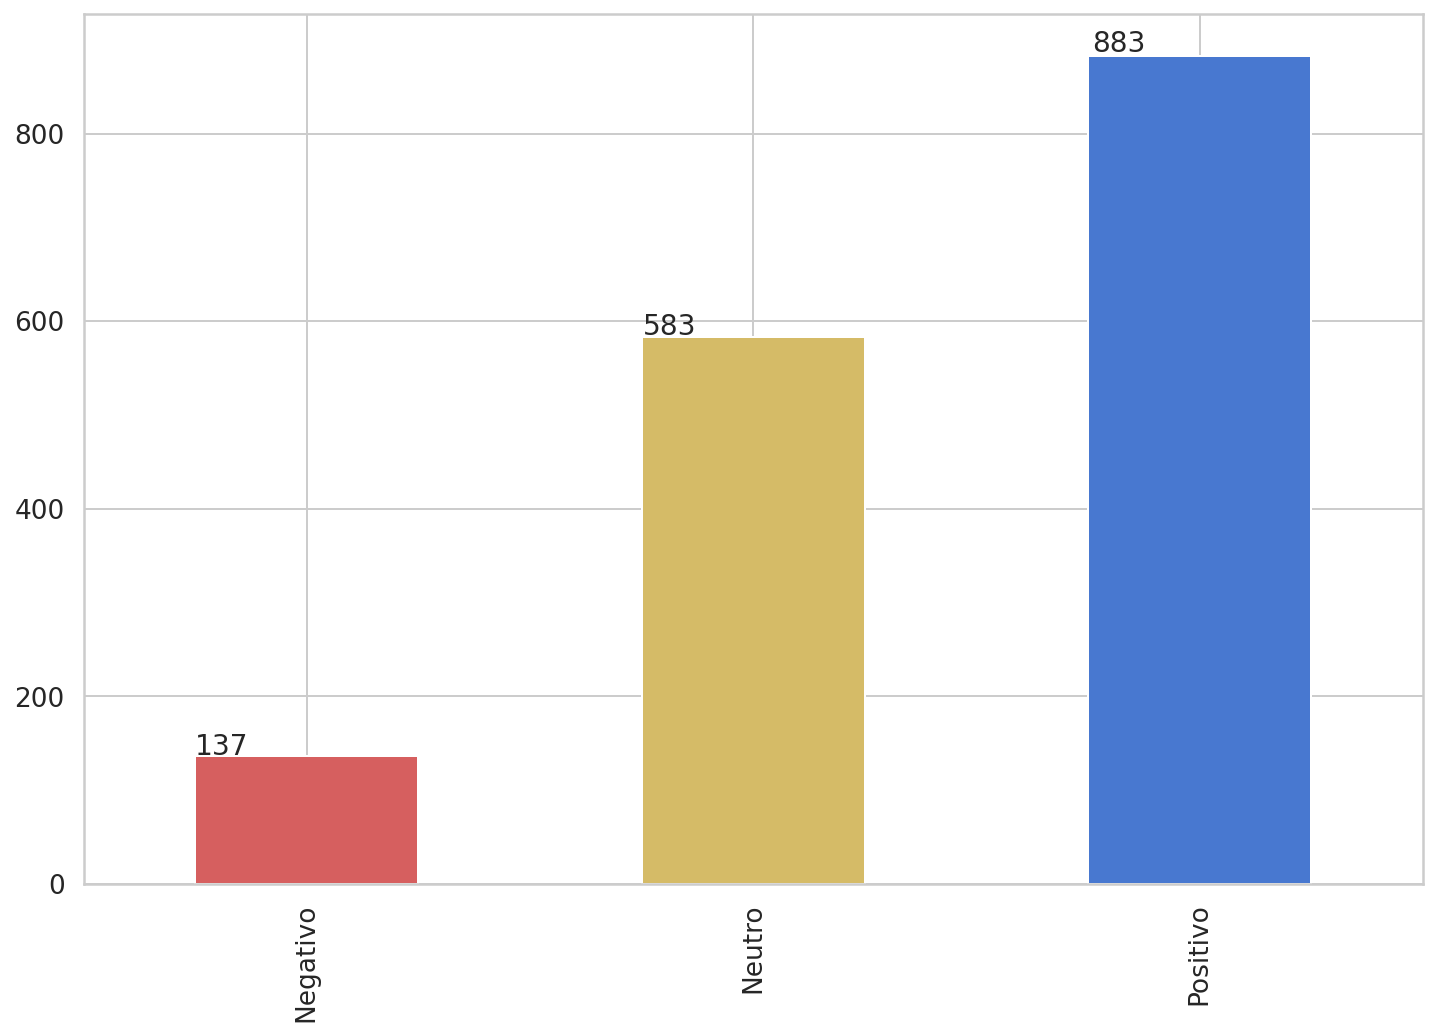

In [ ]:
# Característica do conjunto original
axx = df['sentiment'].value_counts(ascending=True).plot(kind='bar', color=['r', 'y','b']);
#inserir legendas acima das barras
for p in axx.patches:
  axx.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=14)

In [ ]:
tqdm.pandas(desc='Limpando o texto')
df["content_text"] = df["comment_text"].progress_apply(lambda x: remove_retweet(x))
df["comment_text"] = df["comment_text"].progress_apply(lambda x: remove_urls(x))

df["comment_text"] = df["comment_text"].progress_apply(lambda x: removerAcentos(x))

df["comment_text"] = df["comment_text"].swifter.allow_dask_on_strings(enable=True).apply(lambda x: x.lower())

df['comment_text'] = df['comment_text'].progress_apply(lambda x: preprocessorTwitter(x))

df["comment_text"] = df["comment_text"].progress_apply(lambda x: removePontuacao(x))

df["comment_text"] = df["comment_text"].progress_apply(lambda x: removerCaracteresEspeciais(x))

df["comment_text"] = df["comment_text"].progress_apply(lambda x: removeruidos(x))

tqdm.pandas(desc='Removendo as stopwords e tokenizando o texto')
df['comment_text'] = df['comment_text'].progress_apply(lambda x: remove_stopwords(x).strip())

df["comment_text"] = df["comment_text"].progress_apply(lambda x: remove_KKK2(x))

#df["comment_text"] = df["comment_text"].apply(lambda x: re.compile('\#').sub('', re.compile('rt @').sub('@', x, count=1).strip()))
#df["comment_text"] = df["comment_text"].apply(lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x))

#df["comment_text"] = df["comment_text"].swifter.allow_dask_on_strings(enable=True).apply(lambda x: x.lower())
#df["comment_text"] = df["comment_text"].swifter.allow_dask_on_strings(enable=True).apply(lambda x: deEmojify(x))
#df["partido"] = 'PT'

df['comment_text'].replace('', np.nan, inplace=True)
df.dropna(subset=['comment_text'], inplace=True)

df.head(5)

Limpando o texto: 100%|██████████| 1603/1603 [00:00<00:00, 23390.86it/s]


Pandas Apply:   0%|          | 0/1603 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1603 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1603 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1603 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1603 [00:00<?, ?it/s]

Removendo as stopwords e tokenizando o texto: 100%|██████████| 1603/1603 [00:00<00:00, 149049.40it/s]


,displayname,username,verified,created,favorite_count,location,followersCount,friendsCount,profileImageUrl,url,id,date,retweetCount,replyCount,likeCount,quoteCount,comment_text,status,sentiment,content_text
0,José Benedito,josebcardos,False,2014-11-21T19:05:23+00:00,4371,NaN,491,713,https://pbs.twimg.com/profile_images/138030977...,https://twitter.com/josebcardos,2887232326,2022-07-12T13:19:38+00:00,0,0,0,0,precisamos evitar brasil vire pais bang bang,https://twitter.com/josebcardos/status/1546846...,Positivo,@jasonresistenc1 @ThiagoResiste @Anitta Precis...
1,N C Mennucci,Natan65784221,False,2020-03-27T08:46:48+00:00,53448,são paulo,5459,5969,https://pbs.twimg.com/profile_images/153847068...,https://twitter.com/Natan65784221,1243459401601765376,2022-07-12T13:18:52+00:00,0,0,0,0,chofer miliciano puxando saco p ganhar grana v...,https://twitter.com/Natan65784221/status/15468...,Positivo,@SergioAJBarrett O chofer de Miliciano puxando...
2,Suzi NH 🚩🇧🇷,suzi_nh,False,2019-06-18T20:25:06+00:00,153691,NaN,4617,4761,https://pbs.twimg.com/profile_images/144245771...,https://twitter.com/suzi_nh,1141079411510435841,2022-07-12T13:18:20+00:00,0,0,0,0,apoios lula nao param so gente boa paz,https://twitter.com/suzi_nh/status/15468464214...,Positivo,Os apoios a Lula não param.\nSó gente boa e de...
3,Rogério Lula Daros #LulaEstadistaDoPlaneta,daros_rogerio,False,2020-07-11T20:29:24+00:00,21696,"florianópolis , Brasil",1937,2906,https://pbs.twimg.com/profile_images/128205286...,https://twitter.com/daros_rogerio,1282049180609978374,2022-07-12T13:17:59+00:00,0,0,1,0,bolsonarismo mata carluxo adelio amigos intimo...,https://twitter.com/daros_rogerio/status/15468...,Positivo,BOLSONARISMO MATA\n#BolsonarismoMATA \n#Bolson...
4,Jean Sousa,js6352576,False,2022-03-21T14:25:34+00:00,3361,NaN,61,123,https://pbs.twimg.com/profile_images/151966465...,https://twitter.com/js6352576,1505912507604652033,2022-07-12T13:17:50+00:00,0,0,0,0,anitta falou falado nao discussao,https://twitter.com/js6352576/status/154684629...,Positivo,"Se Anitta falou, está falado! Não tem discussã..."


In [ ]:
#df["comment_text"] = df["comment_text"].swifter.allow_dask_on_strings(enable=True).apply(lambda x: x.lower())
#df["comment_text"] = df["comment_text"].swifter.allow_dask_on_strings(enable=True).apply(lambda x: deEmojify(x))
#df["comment_text"] = df["comment_text"].apply(lambda x: re.compile('\#').sub('', re.compile('rt @').sub('@', x, count=1).strip()))
#df["comment_text"] = df["comment_text"].apply(lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x))
#df["comment_text"] = df["comment_text"].swifter.allow_dask_on_strings(enable=True).apply(lambda x: corretorGramatical(x))
#df


In [ ]:
print('Unique comments: ', df.comment_text.nunique() == df.shape[0])
print('Count sentiments: ', df.sentiment.nunique(), ' - Unique Sentiments', df.sentiment.unique()) #df.nunique(axis=1)
print('Null values: ', df[['sentiment', 'comment_text']].isnull().values.any())
# df[df.isna().any(axis=1)]

Unique comments:  False
Count sentiments:  3  - Unique Sentiments ['Positivo' 'Neutro' 'Negativo']
Null values:  False


In [ ]:
print('average sentence length: ', df.comment_text.str.split().str.len().mean())
print('stdev sentence length: ', df.comment_text.str.split().str.len().std())

average sentence length:  7.881370091896407
stdev sentence length:  6.717866319536654


## Normalizacao Sentimento

In [ ]:
values_sentiment = df.sentiment.value_counts(ascending=False)
print('Count of 1 per label: \n', df['sentiment'].sum(), '\n') # Label counts, may need to downsample or upsample
print('Count of 0 per label: \n', df['sentiment'].eq(0).sum())
print('Count Sentiments: \n', values_sentiment)
df_temp = df.copy()


Count of 1 per label: 
 PositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoNeutroNeutroPositivoPositivoNeutroPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoNegativoPositivoPositivoPositivoPositivoPositivoPositivoPositivoNeutroPositivoPositivoPositivoNeutroPositivoPositivoPositivoPositivoPositivoNeutroPositivoPositivoNeutroPositivoNeutroNeutroPositivoPositivoPositivoPositivoPositivoPositivoNeutroPositivoPositivoPositivoPositivoNeutroPositivoPositivoPositivoPositivoNegativoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPositivoNegativoNeutroPositivoNegativoPositivoPositivoNeutroPositivoPositivoNegativoPositivoPositivoPositivoPositivoPositivoPositivoPositivoPo

In [ ]:
def to_sentiment(rating):
  rating = rating
  if rating == 'Negativo':
    return 0
  elif rating == 'Neutro':
    return 1
  else: 
    return 2

df['sentiment'] = df.sentiment.apply(to_sentiment)

In [ ]:
class_names = ['Negativo', 'Neutro', 'Positivo']

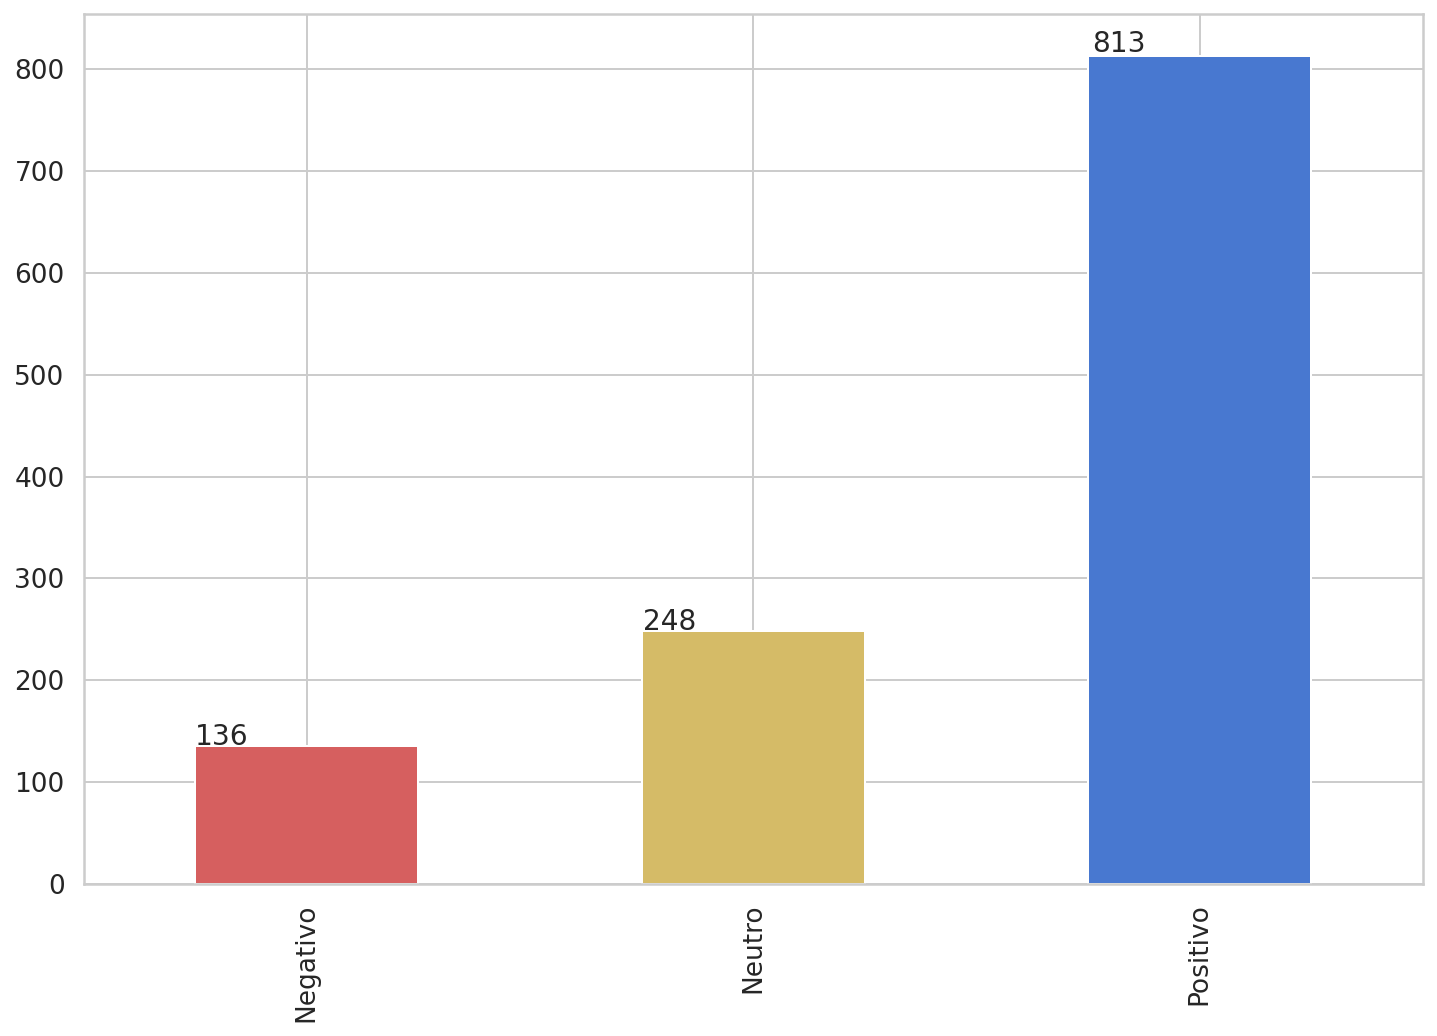

In [ ]:
#ax = sns.countplot(df.sentiment)
#plt.xlabel('comment sentiment')
#ax.set_xticklabels(class_names);

# Característica do conjunto original
axx = df['sentiment'].value_counts(ascending=True).plot(kind='bar', color=['r','y','b']);
axx.set_xticklabels(class_names);
#inserir legendas acima das barras
for p in axx.patches:
  axx.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=14)

**Imprimindo o percentual de cada valor da classe**

---


In [ ]:
p = df.groupby(['sentiment']).size().transform(lambda x: x/sum(x))
results = pd.DataFrame(p)
results = results.rename(columns = {0:'Original'})
results

,Original
sentiment,
0,0.113617
1,0.207185
2,0.679198


In [ ]:
#Embaralha as linhas do dataframe.
df = df.sample(frac=1).reset_index(drop=True)
df

,displayname,username,verified,created,favorite_count,location,followersCount,friendsCount,profileImageUrl,url,id,date,retweetCount,replyCount,likeCount,quoteCount,comment_text,status,sentiment,content_text
0,Carlos N8,Carlosgrupon8,False,2012-04-29T01:34:19+00:00,171146,Brasil Fortaleza BH SP,4556,1861,https://pbs.twimg.com/profile_images/152330557...,https://twitter.com/Carlosgrupon8,565882892,2022-07-12T01:16:31+00:00,0,0,0,0,olha garota pode ta precisando apoio tambem ab...,https://twitter.com/Carlosgrupon8/status/15466...,2,//t.co/NcagC36zKI
1,Dani,EmmaVarda,False,2018-03-19T13:00:03+00:00,98997,"Brasília, Brasil",527,2177,https://pbs.twimg.com/profile_images/150748784...,https://twitter.com/EmmaVarda,975718542258655232,2022-07-12T02:56:35+00:00,1,0,3,0,vamos pra cima brasil envolvido i spaces vaxr,https://twitter.com/EmmaVarda/status/154668995...,2,Vamos pra cima!\nO Brasil envolvido no 13 \n#L...
2,Luciene Cristina Urb,UrbLuciene,False,2017-08-31T07:37:04+00:00,6482,NaN,3088,5001,https://abs.twimg.com/sticky/default_profile_i...,https://twitter.com/UrbLuciene,903159689051066369,2022-07-11T23:47:52+00:00,1,0,1,1,bolsonaro pior presidente mundo,https://twitter.com/UrbLuciene/status/15466424...,0,@FabioBaruchk @AndreVM1914 #BolsonaroAssassino...
3,Cáh 💃🏾🚩13⭐😷🦋,carmenmartins,False,2009-09-21T19:34:28+00:00,49026,Mundo de Nárnia,1524,1572,https://pbs.twimg.com/profile_images/145752101...,https://twitter.com/carmenmartins,76118480,2022-07-12T02:54:52+00:00,0,1,7,0,sentiram anitta ta on,https://twitter.com/carmenmartins/status/15466...,1,"01, 02 e o 03 e 04 sentiram???\n\nANITTA TÁ ON..."
4,Jose Maria Santana,JoseMar87142264,False,2022-05-12T02:34:34+00:00,7377,NaN,240,1296,https://pbs.twimg.com/profile_images/152457875...,https://twitter.com/JoseMar87142264,1524578652612083713,2022-07-12T07:39:17+00:00,1,0,1,0,nao vao passar impunes,https://twitter.com/JoseMar87142264/status/154...,2,Más não vão passar impunes mesmo!!!#LulaNoPrim...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Sandroka13📖🐝🦑,Sandroka131,False,2020-08-25T19:49:49+00:00,41532,Brasil,5229,3643,https://pbs.twimg.com/profile_images/150884173...,https://twitter.com/Sandroka131,1298346611291181056,2022-07-12T01:52:17+00:00,15,2,19,0,bossonaro segue mostrando veio destruir brasil...,https://twitter.com/Sandroka131/status/1546673...,2,"destruir o Brasil, enriquecer, proteger a fam..."
1193,cacto perdida 🏳️‍🌈,cactoperdida,False,2022-03-09T05:56:32+00:00,4290,"Porto Alegre, RS",91,259,https://pbs.twimg.com/profile_images/153096909...,https://twitter.com/cactoperdida,1501436718028935169,2022-07-12T00:07:56+00:00,0,1,1,0,amiga to real mta fe vai rolar primeiro turno ...,https://twitter.com/cactoperdida/status/154664...,2,"@DanielaNora5 @LulaOficial amiga, tô real com ..."
1194,Gilson Pereira,GilsonJPereira_,False,2011-02-08T23:31:02+00:00,8,NaN,9,60,https://pbs.twimg.com/profile_images/997825437...,https://twitter.com/GilsonJPereira_,249392063,2022-07-12T09:42:30+00:00,0,0,0,0,eeeee ohhh ta confessando,https://twitter.com/GilsonJPereira_/status/154...,1,@CarlosBolsonaro eeeee ohhh.... Tá se confessa...
1195,Suzi NH 🚩🇧🇷,suzi_nh,False,2019-06-18T20:25:06+00:00,153691,NaN,4617,4761,https://pbs.twimg.com/profile_images/144245771...,https://twitter.com/suzi_nh,1141079411510435841,2022-07-12T13:18:20+00:00,0,0,0,0,apoios lula nao param so gente boa paz,https://twitter.com/suzi_nh/status/15468464214...,2,Os apoios a Lula não param.\nSó gente boa e de...


In [ ]:
labels = list(df.sentiment.values)
labels_count = df.sentiment.value_counts(ascending=True)

print(df['sentiment'].value_counts())


2    813
1    248
0    136
Name: sentiment, dtype: int64


## Análise das labels

In [ ]:
def bar_values(ax, labels):
  
  rects = ax.patches

  for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=15)

  return ax



In [ ]:
def plot_histogram_labels(title, x_label, y_label, labels, hue_label=None, data=None):

  sns.set(style='whitegrid', font_scale=2)
  plt.figure(figsize=(14, 8))

  ax = sns.barplot(x_label, y_label, hue=hue_label, data=data, palette='coolwarm')

  plt.title(title, fontsize=20)
  plt.xlabel('')
  plt.ylabel('Comentários', fontsize=15)

  bar_values(ax, labels)

  plt.show()

Label columns:  [0, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1,

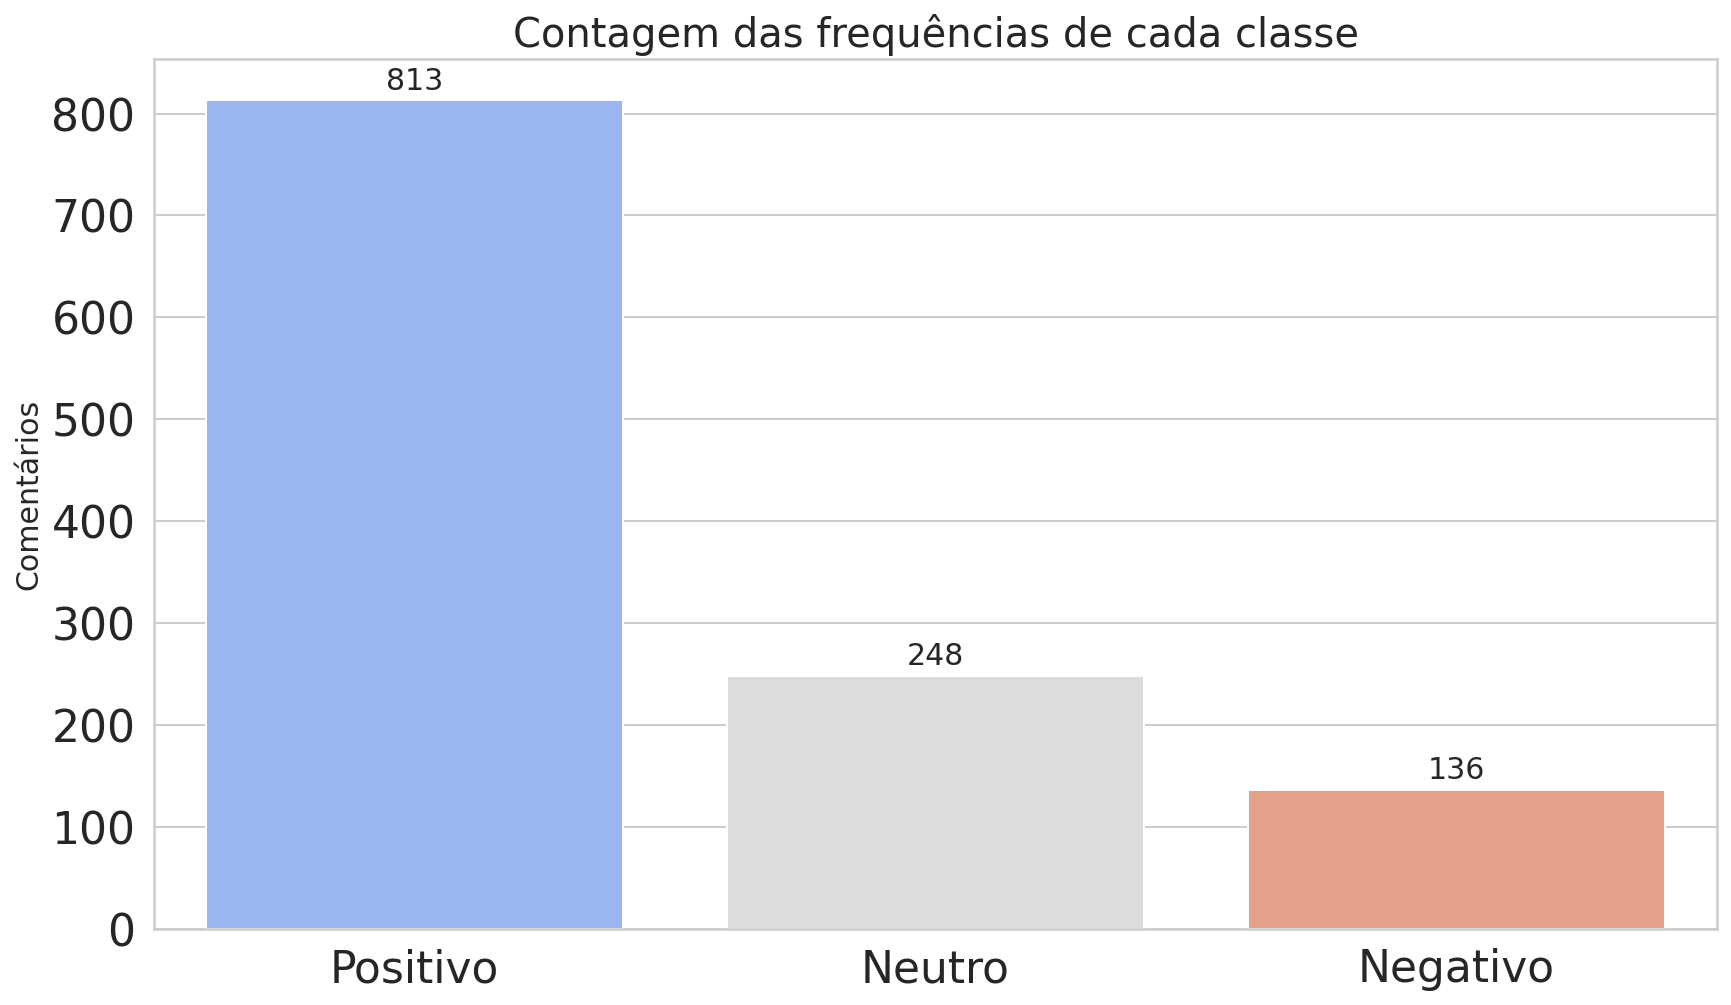

In [ ]:
cols = df['sentiment']
label_cols = list(cols[2:])
num_labels = len(label_cols)
print('Label columns: ', label_cols)

plot_histogram_labels(title='Contagem das frequências de cada classe', x_label=values_sentiment.keys(), y_label=values_sentiment.values,
                      labels=values_sentiment.values)

WordCloud das palavras mais usadas

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

def word_cloud_text(text):

  cmap = plt.cm.coolwarm

  cloud = WordCloud(
      stopwords=stopwords.words('portuguese'),
      background_color='white',
      colormap=cmap,
      collocations=False,
      width=2500,
      height=1800).generate(" ".join(text))

  return cloud

In [ ]:
def plot_cloud_text(cloud, sub, nrows=False, ncols=False, index=False):

  if(nrows):
    plt.subplot(nrows, ncols, index)
    plt.axis('off')
    plt.title(sub, fontsize=20)
    plt.imshow(cloud);
  else:
    plt.axis('off')
    plt.title(sub, fontsize=20)
    plt.imshow(cloud);


In [ ]:
comments = df_temp['comment_text'].values

DICT_LABELS = {
    'Positivo':  'Positivo',
    'Negativo':  'Negativo',
    'Neutro':    'Neutro',
}

for l in DICT_LABELS:
    DICT_LABELS[l] = df_temp[df_temp['sentiment']==DICT_LABELS[l]]['comment_text'].values

cloud_comments = word_cloud_text(comments)
cloud_positivo = word_cloud_text(DICT_LABELS['Positivo'])
cloud_negativo = word_cloud_text(DICT_LABELS['Negativo'])
cloud_neutro   = word_cloud_text(DICT_LABELS['Neutro'])



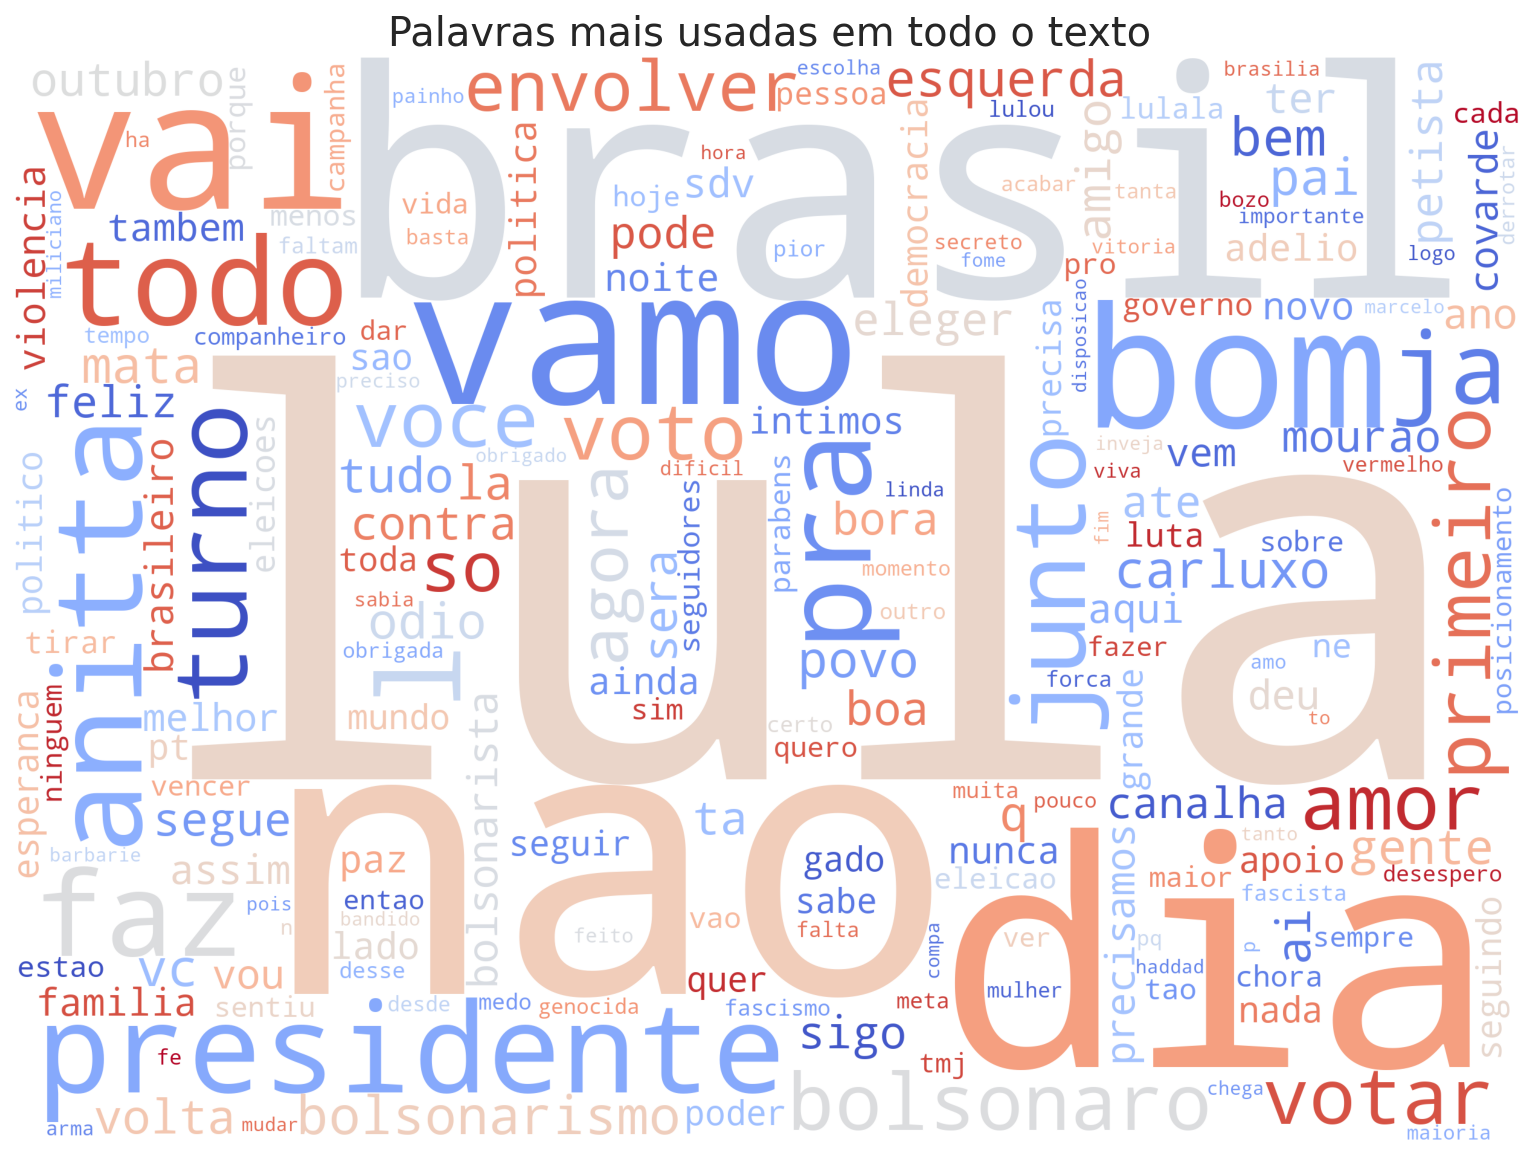

In [ ]:
plt.figure(figsize=(20, 10))
plot_cloud_text(cloud_comments, 'Palavras mais usadas em todo o texto')

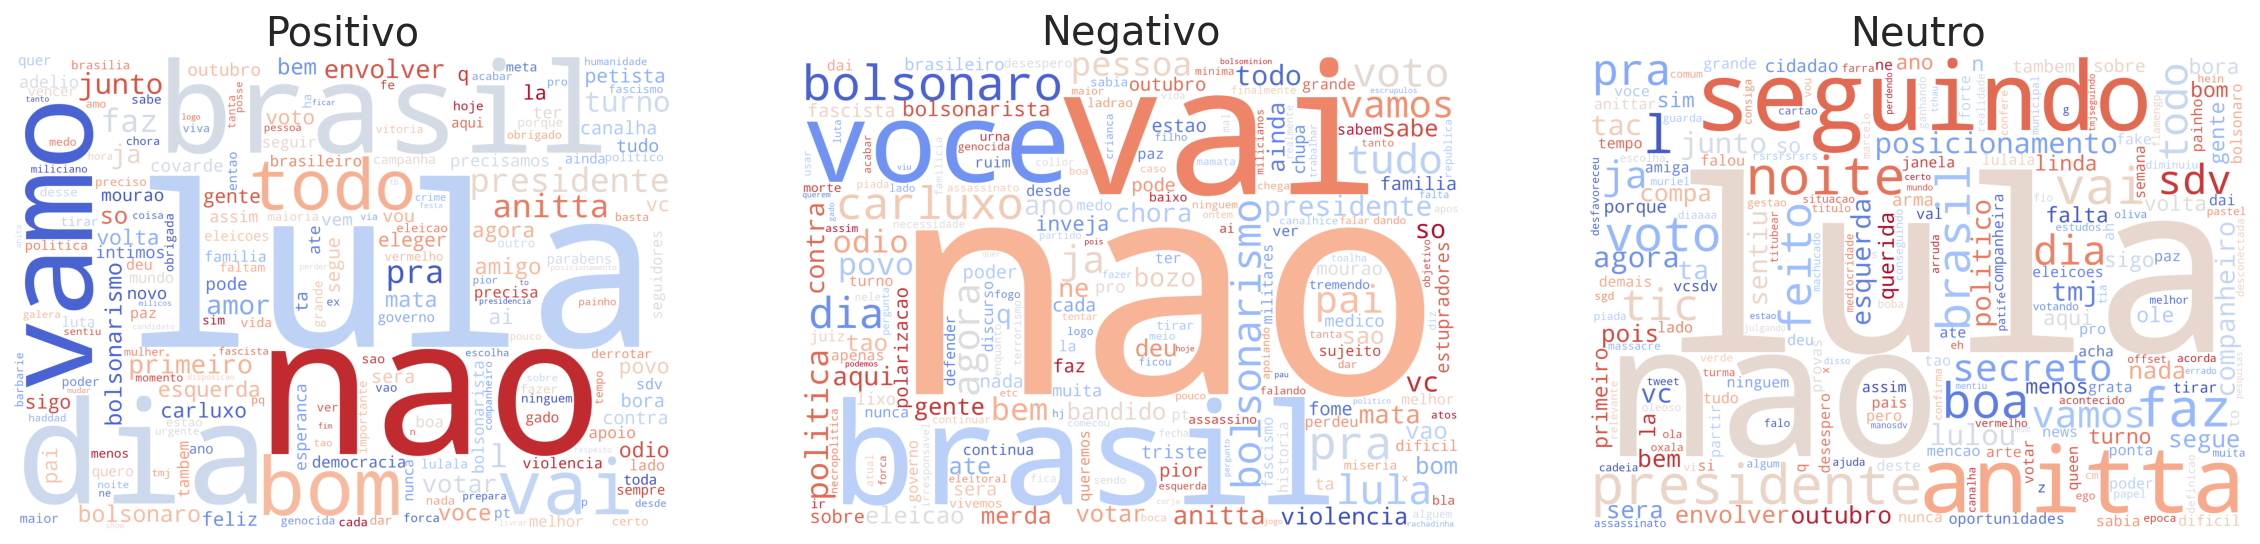

In [ ]:
plt.figure(figsize=(20, 10))

plot_cloud_text(cloud_positivo, 'Positivo', nrows=2, ncols=3, index=1)
plot_cloud_text(cloud_negativo, 'Negativo', nrows=2, ncols=3, index=2)
plot_cloud_text(cloud_neutro,   'Neutro',   nrows=2, ncols=3,   index=3)

plt.show()



## Data Processing

### Bert

Você já deve saber que os modelos de Machine Learning não funcionam com texto bruto. Você precisa converter texto em números (de algum tipo). O BERT requer ainda mais attention. Aqui estão os requisitos:

     Adicione tokens especiais para separar frases e fazer a classificação
     Passe sequências de comprimento constante (introduza o preenchimento)
     Criar array de 0s (pad token) e 1s (real token) chamou a máscara de atenção

A biblioteca Transformers fornece (você adivinhou) uma ampla variedade de modelos de Transformers (incluindo BERT). Funciona com TensorFlow e PyTorch! Ele também inclui tokenizers pré-construídos que fazem o trabalho pesado para nós!

É possível usar outros modelos pré-treinados que correspondem a escolho do nodelo. e.g.,
```
BERT:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True) 

XLNet:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=False) 

RoBERTa:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base', do_lower_case=False)
```


In [ ]:
PRE_TRAINED_MODEL_NAME = 'neuralmind/bert-base-portuguese-cased'

https://huggingface.co/neuralmind/bert-base-portuguese-cased

https://github.com/neuralmind-ai/portuguese-bert



Você pode usar uma versão com e sem caixa de BERT e tokenizer. Eu experimentei com ambos. A versão em caixa funciona melhor. Intuitivamente, isso faz sentido, já que "RUIM" pode transmitir mais sentimento do que "ruim"

Vamos carregar o pre-trained BertTokenizer:

In [ ]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

loading file https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/aa6d50227b77416b26162efcf0cc9e9a702d13920840322060a2b41a44a8aff4.af25fb1e29ad0175300146695fd80069be69b211c52fa5486fa8aae2754cc814
loading file https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/added_tokens.json from cache at /root/.cache/huggingface/transformers/9188d297517828a862f4e0b0700968574ca7ad38fbc0832c409bf7a9e5576b74.5cc6e825eb228a7a5cfd27cb4d7151e97a79fb962b31aaf1813aa102e746584b
loading file https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/special_tokens_map.json from cache at /root/.cache/huggingface/transformers/eecc45187d085a1169eed91017d358cc0e9cbdd5dc236bcd710059dbf0a2f816.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d
loading file https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/tokenizer_config.json from cache at /root/.cache/huggi

Usaremos este texto para entender o processo de tokenização:

In [ ]:
sample_txt = 'Os lábios da sabedoria estão fechados, exceto aos ouvidos do entendimento.'

In [ ]:
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: Os lábios da sabedoria estão fechados, exceto aos ouvidos do entendimento.
   Tokens: ['Os', 'lá', '##bios', 'da', 'sabedoria', 'estão', 'fechados', ',', 'exceto', 'aos', 'ouvidos', 'do', 'entendimento', '.']
Token IDs: [533, 2920, 16198, 180, 18676, 1376, 19977, 117, 7601, 712, 22073, 171, 12884, 119]


### Tokens Especiais

`[SEP]` - marcador para o final de uma frase

In [ ]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

`[CLS]` - devemos adicionar este token no início de cada frase, para que o BERT saiba que estamos fazendo a classificação

In [ ]:
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 101)

Há também um token especial para preenchimento(padding):

In [ ]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

O BERT entende os tokens que estavam no conjunto de treinamento. Todo o resto pode ser codificado usando o token `[UNK]` (desconhecido):

In [ ]:
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 100)

Todo esse trabalho pode ser feito usando o método [`encode_plus()`](https://huggingface.co/transformers/main_classes/tokenizer.html#transformers.PreTrainedTokenizer.encode_plus):

In [ ]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  #padding='longest',
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

encoding.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


dict_keys(['input_ids', 'attention_mask'])

Os IDs de token agora são armazenados em um tensor e preenchidos com um comprimento de 32:

In [ ]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

32


tensor([  101,   533,  2920, 16198,   180, 18676,  1376, 19977,   117,  7601,
          712, 22073,   171, 12884,   119,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0])

A máscara de atenção tem o mesmo comprimento:

In [ ]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

32


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

Podemos inverter a tokenização para dar uma olhada nos tokens especiais:

In [ ]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

['[CLS]',
 'Os',
 'lá',
 '##bios',
 'da',
 'sabedoria',
 'estão',
 'fechados',
 ',',
 'exceto',
 'aos',
 'ouvidos',
 'do',
 'entendimento',
 '.',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

### Escolhendo o comprimento da sequência

O BERT trabalha com sequências de comprimento fixo. Usaremos uma estratégia simples para escolher o comprimento máximo. Vamos armazenar o tamanho do token de cada avaliação:

In [ ]:
token_lens = []

for txt in df.comment_text:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

e plota a distribuição:

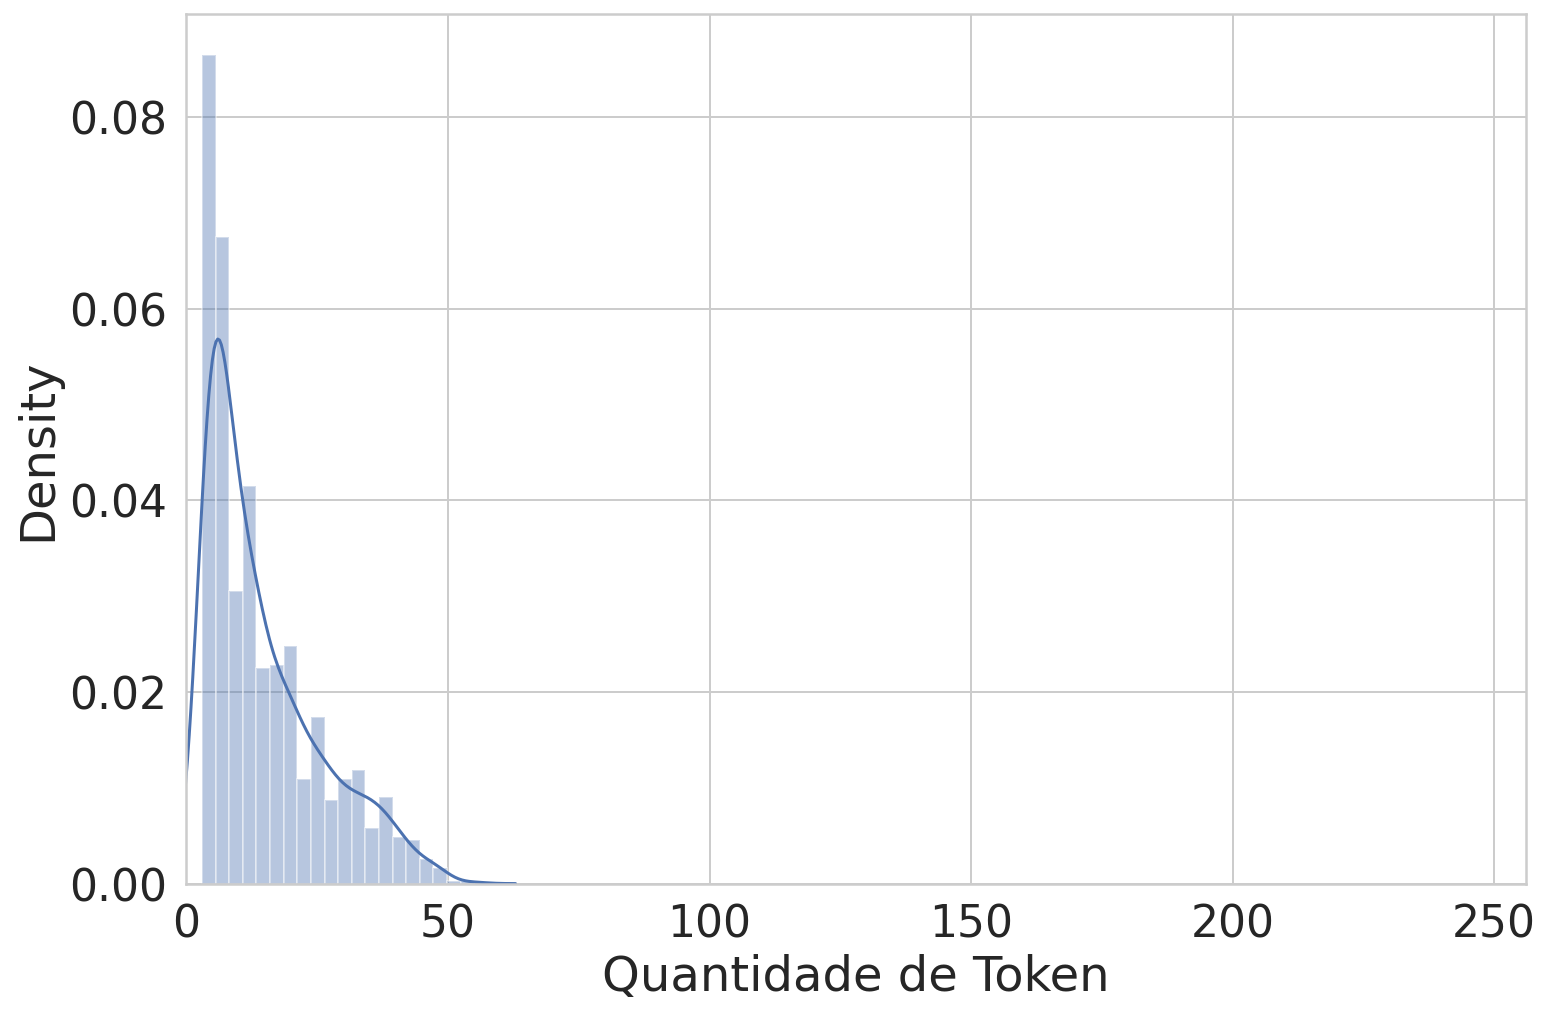

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Quantidade de Token');

A maioria das análises parece conter menos de 128 tokens, mas estaremos no lado seguro e escolheremos um comprimento máximo de 160.

In [ ]:
MAX_LEN = 160

Temos todos os blocos de construção necessários para criar um conjunto de dados PyTorch. Vamos fazer isso:

In [ ]:
class GPReviewDataset(Dataset):

  def __init__(self, comment_text, targets, tokenizer, max_len):
    self.comment_text = comment_text
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.comment_text)
  
  def __getitem__(self, item):
    comment = str(self.comment_text[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      comment,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      #padding='longest',
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'comment_text': comment,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

O tokenizer está fazendo a maior parte do trabalho pesado para nós. Também devolvemos os textos de revisão, para que seja mais fácil avaliar as previsões do nosso modelo. Vamos dividir os dados:

## Divisão do conjunto de dados
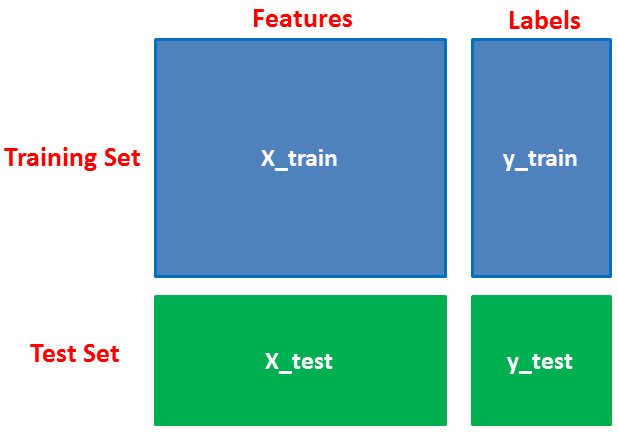




**Imprimindo o percentual de cada valor da classe**

---

In [ ]:
p = df.groupby(['sentiment']).size().transform(lambda x: x/sum(x)) 
results = results.assign(Percent=p) # add column with results to DataFrame
results

,Original,Percent
sentiment,,
0,0.113617,0.113617
1,0.207185,0.207185
2,0.679198,0.679198


In [ ]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Divisão do conjunto de dados teste (1/4); treino (3/4)
#x_df_train, x_df_test = train_test_split(df, train_size=0.75, random_state=RANDOM_SEED, stratify=df['sentiment'])
#y_df_train, y_df_test = train_test_split(x_df_test, test_size=0.25, random_state=RANDOM_SEED)

#x_df_train, x_df_test, y_df_train, y_df_test = train_test_split(df, test_size=0.25, random_state=RANDOM_SEED, stratify=df['sentiment'])
x_df_train, x_df_test, y_df_train, y_df_test = train_test_split(df,
                                                    df['sentiment'],
                                                    stratify=df['sentiment'],
                                                    test_size=0.25, random_state=RANDOM_SEED)

#verificar dimensões dos subconjuntos
#x_df_train.shape, x_df_test.shape, y_df_train.shape, y_df_test.shape

x_df_train.shape, x_df_test.shape, y_df_train.shape, y_df_test.shape


((897, 20), (300, 20), (897,), (300,))


### Verificando os conjuntos de treino e teste

In [ ]:
# function to return key for any value
def get_key(val, dictionary):
    for key, value in dictionary.items():
         if val == value:
             return key
 
    return "key doesn't exist"

In [ ]:

def count_occurrences_labels(df_values):
  CLASSES = {'Negativo':  0, 'Neutro':    1, 'Positivo':  2 }

  vet = df_values.value_counts(ascending=False)

  for value, label in zip(vet, CLASSES):
    CLASSES[label] += int(value)
  return CLASSES

In [ ]:
def print_occurences_labels(DICT_CLASSES):

  print("Total de classificações: \n", sum(DICT_CLASSES.values()))

  print("Quantidade de ocorrências de cada classe:")
  for label in DICT_CLASSES :
    print(" " + label + ": " + str(DICT_CLASSES[label]))
  print(str(DICT_CLASSES))

In [ ]:
def calculates_labels_proportion(DICT_CLASSES, labels_names):

  proportions = {}

  for label in labels_names:
    prop = DICT_CLASSES[label]/sum(DICT_CLASSES.values())
    proportions.update({label: prop})
    
  df = pd.DataFrame([proportions])

  return df

### 50% para o treino e 50% para o teste
### Contagem de ocorrências

In [ ]:
# Conjunto de dados
classif_data = count_occurrences_labels(df['sentiment'])
print_occurences_labels(classif_data)

Total de classificações: 
 1200
Quantidade de ocorrências de cada classe:
 Negativo: 813
 Neutro: 249
 Positivo: 138
{'Negativo': 813, 'Neutro': 249, 'Positivo': 138}


In [ ]:
# Conjunto de treino
classif_train = count_occurrences_labels(pd.DataFrame(y_df_train)['sentiment'])
print_occurences_labels(classif_train)

Total de classificações: 
 900
Quantidade de ocorrências de cada classe:
 Negativo: 609
 Neutro: 187
 Positivo: 104
{'Negativo': 609, 'Neutro': 187, 'Positivo': 104}


In [ ]:
# Conjunto de teste
classif_test = count_occurrences_labels(pd.DataFrame(y_df_test)['sentiment'])
print_occurences_labels(classif_test)

Total de classificações: 
 303
Quantidade de ocorrências de cada classe:
 Negativo: 204
 Neutro: 63
 Positivo: 36
{'Negativo': 204, 'Neutro': 63, 'Positivo': 36}


In [ ]:
classif_train_test = list(classif_data.values())
classif_train_test.extend(list(classif_train.values()))
classif_train_test.extend(list(classif_test.values()))


inform_train_test = pd.DataFrame(columns=['labels', 'ocorr', 'set'])

for label, value in zip(classif_data.keys(), classif_data.values()):
  inform_train_test = inform_train_test.append({
      'labels': label,
      'ocorr': value
  }, ignore_index=True)

for label, value in zip(classif_train.keys(), classif_train.values()):
  inform_train_test = inform_train_test.append({
      'labels': label,
      'ocorr': value
  }, ignore_index=True)

for label, value in zip(classif_test.keys(), classif_test.values()):
  inform_train_test = inform_train_test.append({
      'labels': label,
      'ocorr': value
  }, ignore_index=True)


inform_train_test['set'][0:3] = 'data'
inform_train_test['set'][3:6] = 'train'
inform_train_test['set'][6:9] = 'test'

inform_train_test

,labels,ocorr,set
0,Negativo,813,data
1,Neutro,249,data
2,Positivo,138,data
3,Negativo,609,train
4,Neutro,187,train
5,Positivo,104,train
6,Negativo,204,test
7,Neutro,63,test
8,Positivo,36,test


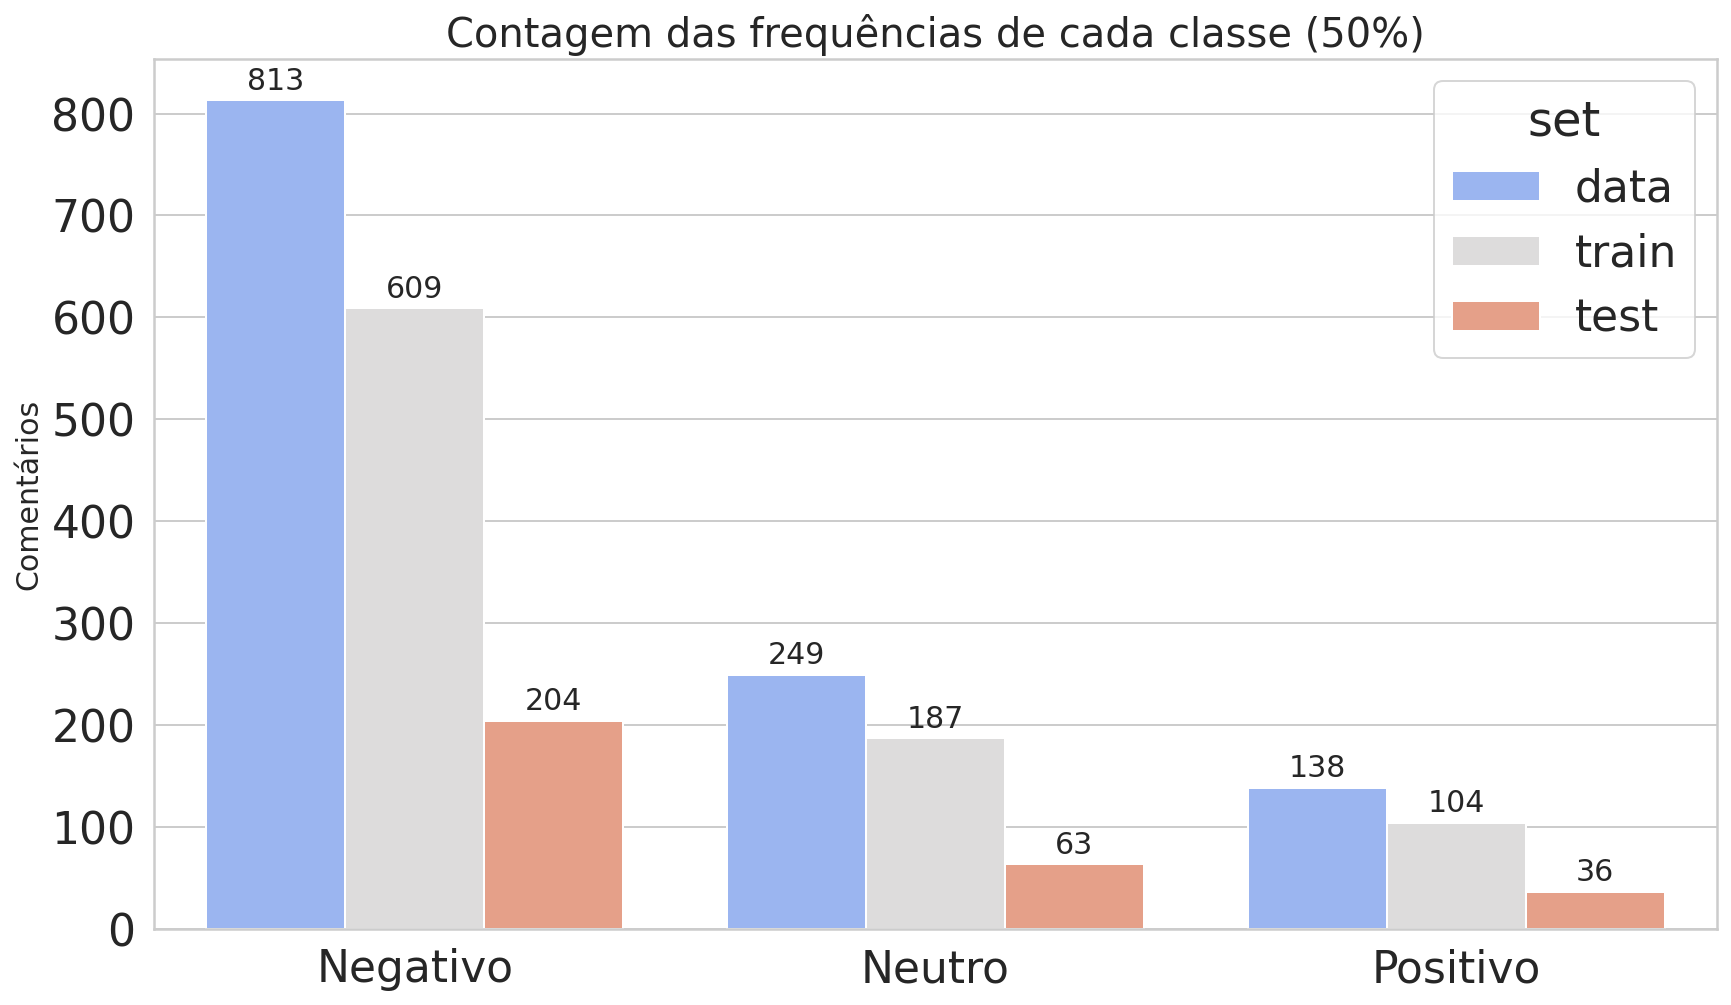

In [ ]:
plot_histogram_labels('Contagem das frequências de cada classe (50%)', x_label='labels', y_label='ocorr',
                      labels=classif_train_test, hue_label='set', data=inform_train_test)


### Proporções

In [ ]:
prop_data = calculates_labels_proportion(classif_data, DICT_LABELS)
prop_train = calculates_labels_proportion(classif_train, DICT_LABELS)
prop_test = calculates_labels_proportion(classif_test, DICT_LABELS)

result_prop = pd.concat([prop_data, prop_train, prop_test], ignore_index=True)
result_prop.rename(index={
    0: 'dataset', 
    1: 'train_set', 
    2: 'test_set'}, inplace=True)

result_prop



,Positivo,Negativo,Neutro
dataset,0.115000,0.677500,0.207500
train_set,0.115556,0.676667,0.207778
test_set,0.118812,0.673267,0.207921


### Matriz de combinação

In [ ]:
from collections import Counter
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix

# Order = 1
pd.DataFrame({
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_df_train, order=1) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_df_test, order=1) for combination in row)
}).T.fillna(0.0)



,"(0,)"
train,795
test,266


Verificando o percentual de cada classe do **conjunto de treinamento**

---



In [ ]:
p = y_df_train.value_counts().transform(lambda x: x/sum(x))

results = results.assign(Estrat=p) # add column with results to DataFrame
results

,Original,Percent,Estrat
sentiment,,,
0,0.113617,0.113617,0.113712
1,0.207185,0.207185,0.207358
2,0.679198,0.679198,0.678930


Também precisamos criar alguns carregadores de dados. Aqui está uma função auxiliar para fazer isso:

### Comentários e Textos para Predição

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    comment_text=df.comment_text.to_numpy(),
    targets=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

### Cria Data Loader

In [ ]:
BATCH_SIZE = 32

train_data_loader = create_data_loader(x_df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(x_df_test, tokenizer, MAX_LEN, BATCH_SIZE)
#test_data_loader = create_data_loader(y_df_test, tokenizer, MAX_LEN, BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Vamos dar uma olhada em um lote de exemplo do nosso carregador de dados de treinamento:

In [ ]:
len(train_data_loader)

29

In [ ]:
data = next(iter(train_data_loader))
data.keys()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


dict_keys(['comment_text', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([32, 160])
torch.Size([32, 160])
torch.Size([32])


## Classificação de sentimentos com BERT e Hugging Face

Existem muitos ajudantes que facilitam o uso do BERT com a biblioteca Transformers. Dependendo da tarefa, você pode usar [BertForSequenceClassification](https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification), [BertForQuestionAnswering](https://huggingface.co/transformers/model_doc/bert. html#bertforquestionanswering) ou outra coisa.

Mas quem se importa, certo? Somos *hardcore*! Usaremos o [BertModel](https://huggingface.co/transformers/model_doc/bert.html#bertmodel) básico e construiremos nosso classificador de sentimento sobre ele. Vamos carregar o modelo:

In [ ]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME, return_dict=False)

loading configuration file https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/e716e2151985ba669e7197b64cdde2552acee146494d40ffaf0688a3f152e6ed.18a0b8b86f3ebd4c8a1d8d6199178feae9971ff5420f1d12f0ed8326ffdff716
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "return_d

In [ ]:
last_hidden_state, pooled_output = bert_model(
  input_ids=encoding['input_ids'], 
  attention_mask=encoding['attention_mask']
)

O `last_hidden_state` é uma sequência de estados ocultos da última camada do modelo. A obtenção do `pooled_output` é feita aplicando o [BertPooler](https://github.com/huggingface/transformers/blob/edf0582c0be87b60f94f41c659ea779876efc7be/src/transformers/modeling_bert.py#L426) em `last_hidden_state`.

Você pode pensar no `pooled_output` como um resumo do conteúdo, de acordo com o BERT.

In [ ]:
bert_model.config.hidden_size

768

Podemos usar todo esse conhecimento para criar um classificador que utilize o modelo BERT:

In [ ]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME, return_dict=False)
    self.drop = nn.Dropout(p=0.3)
    #O last_hidden_state é uma sequência de estados ocultos da última camada do modelo 
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

Nosso classificador delega a maior parte do trabalho pesado ao BertModel. Usamos uma camada dropout para alguma regularização e uma camada totalmente conectada para nossa saída. Observe que estamos retornando a saída bruta da última camada, pois isso é necessário para que a função de perda de entropia cruzada no PyTorch funcione.

Isso deve funcionar como qualquer outro modelo PyTorch. Vamos criar uma instância e movê-la para a GPU:

In [ ]:
print(len(class_names))
model = SentimentClassifier(len(class_names))
model = model.to(device)

3


loading configuration file https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/e716e2151985ba669e7197b64cdde2552acee146494d40ffaf0688a3f152e6ed.18a0b8b86f3ebd4c8a1d8d6199178feae9971ff5420f1d12f0ed8326ffdff716
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "return_d

Moveremos o lote de exemplo de nossos dados de treinamento para a GPU:

In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([32, 160])
torch.Size([32, 160])


Para obter as probabilidades previstas de nosso modelo treinado, aplicaremos a função softmax às saídas:

### Treinamento

Para reproduzir o procedimento de treinamento do documento BERT, usaremos o otimizador [AdamW](https://huggingface.co/transformers/main_classes/optimizer_schedules.html#adamw) fornecido pelo Hugging Face. Ele corrige a queda de peso, por isso é semelhante ao papel original. Também usaremos um agendador linear sem etapas de aquecimento:

### Carrega o Data loader Criado Anteriormente

In [ ]:
EPOCHS = 4

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

Como chegamos a todos os hiperparâmetros? Os autores do BERT têm algumas recomendações para ajuste fino:

- Tamanho do lote: 16, 32
- Taxa de aprendizagem (Adam): 5e-5, 3e-5, 2e-5
- Número de épocas: 2, 3, 4

Vamos ignorar a recomendação do número de épocas, mas ficar com o resto. Observe que aumentar o tamanho do lote reduz significativamente o tempo de treinamento, mas oferece menor precisão.

Vamos continuar escrevendo uma função auxiliar para treinar nosso modelo para uma época:

In [ ]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

Treinar o modelo deve parecer familiar, exceto por duas coisas. O escalonador é chamado toda vez que um lote é alimentado ao modelo. Estamos evitando explodir gradientes cortando os gradientes do modelo usando [clip_grad_norm_](https://pytorch.org/docs/stable/nn.html#clip-grad-norm).

Vamos escrever outro que nos ajude a avaliar o modelo em um determinado carregador de dados:

In [ ]:
%%time

def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.48 µs


Usando esses dois, podemos escrever nosso loop de treinamento. Também armazenaremos o histórico de treinamento:

In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 4)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(x_df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(x_df_test)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/4
----


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train loss 0.8030875304649616 accuracy 0.6677814938684504
Val   loss 0.725182318687439 accuracy 0.6233333333333334

Epoch 2/4
----
Train loss 0.5865666167489414 accuracy 0.7391304347826086
Val   loss 0.6236874759197235 accuracy 0.6900000000000001

Epoch 3/4
----
Train loss 0.3659605386442152 accuracy 0.8439241917502787
Val   loss 0.6836555391550064 accuracy 0.7366666666666667

Epoch 4/4
----
Train loss 0.25958203588580264 accuracy 0.8963210702341137
Val   loss 0.7136815309524536 accuracy 0.7200000000000001

CPU times: user 1min, sys: 3.8 s, total: 1min 4s
Wall time: 1min 7s


Observe que estamos armazenando o estado do melhor modelo, indicado pela maior precisão de validação.

Uau, isso levou algum tempo! Podemos observar a precisão do treinamento versus validação:

In [ ]:
#Exemplo de conversao para CPU
#torch.Tensor.cpu(history['train_acc'][0])


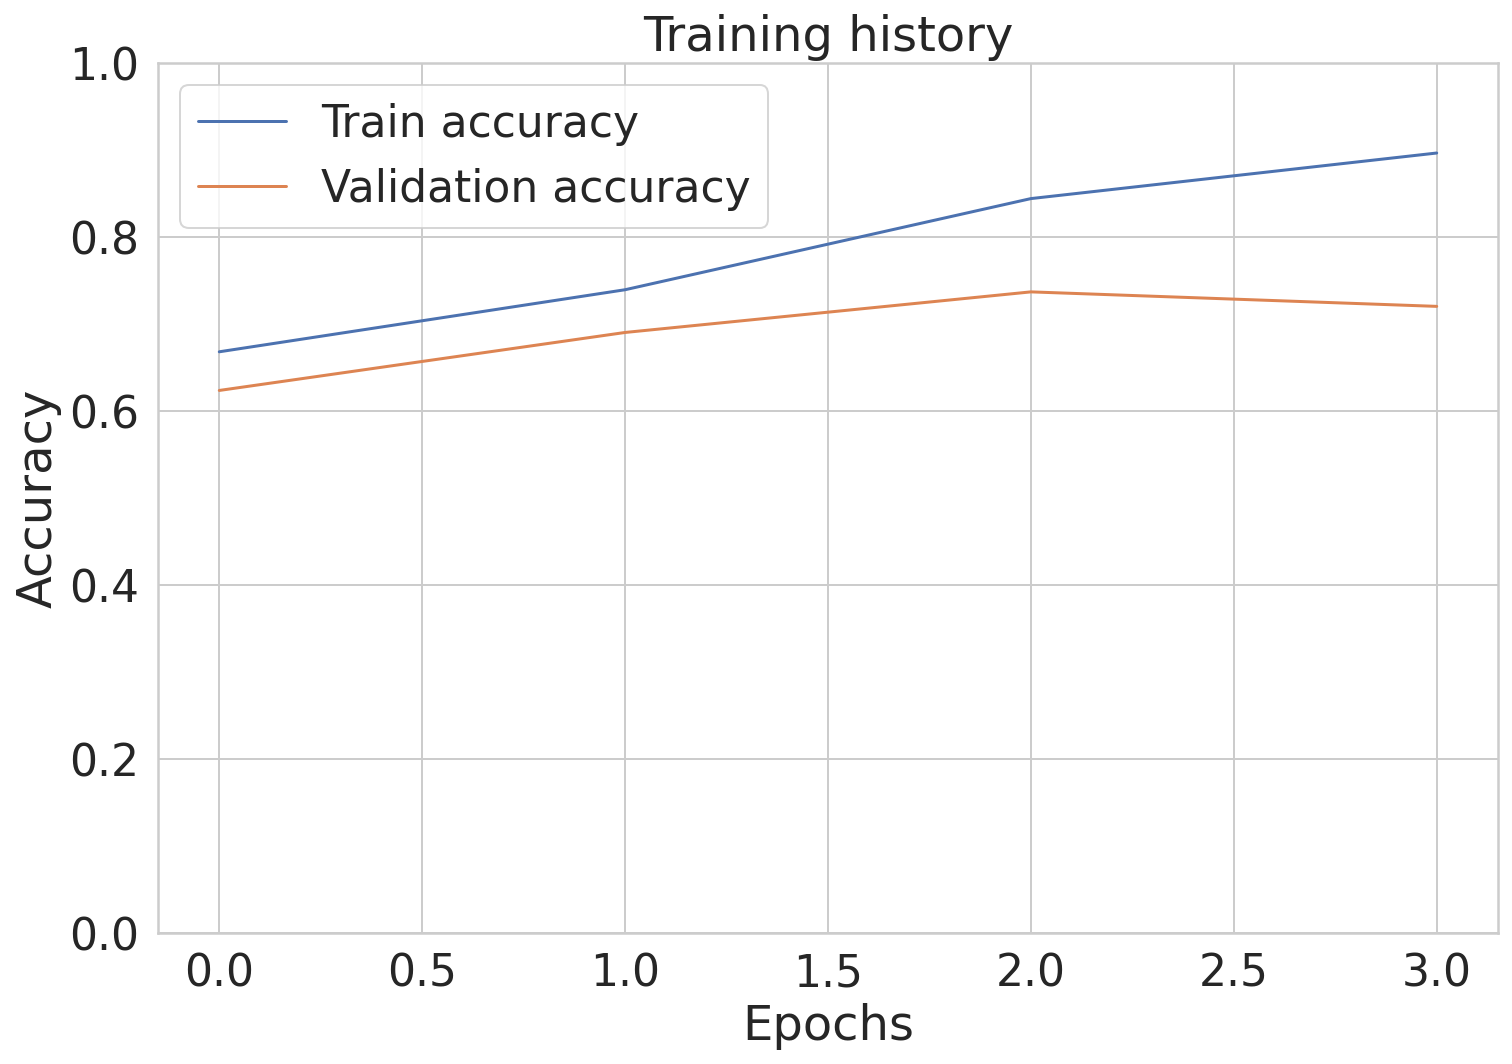

In [ ]:
plt.plot(torch.stack(history['train_acc']).cpu(), label='Train accuracy')
plt.plot(torch.stack(history['val_acc']).cpu(), label='Validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.ylim([0, 1]);

A precisão do treinamento começa a se aproximar de 100% após 4 épocas ou mais. Você pode tentar ajustar os parâmetros um pouco mais.

### Avaliação

Então, quão bom é o nosso modelo na previsão de sentimento? Vamos começar calculando a precisão nos dados de teste:

In [ ]:
test_acc, _ = eval_model(
  model,
  val_data_loader,
  loss_fn,
  device,
  len(x_df_test)
)

test_acc.item()

train_acc, _ = eval_model(
  model,
  train_data_loader,
  loss_fn,
  device,
  len(x_df_train)
)

print(' Treino:    ', train_acc.item())
print(' Validação: ', test_acc.item())


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


 Treino:     0.9241917502787068
 Validação:  0.7200000000000001


A precisão é cerca de 1% menor no conjunto de teste. Nosso modelo parece generalizar bem.

Vamos definir uma função auxiliar para obter as previsões do nosso modelo:

In [ ]:

def get_predictions(model, data_loader):
  model = model.eval()
  
  comment_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["comment_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      comment_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return comment_texts, predictions, prediction_probs, real_values

Isso é semelhante à função de avaliação, exceto que estamos armazenando o texto das revisões e as probabilidades previstas (aplicando o softmax nas saídas do modelo):

In [ ]:
y_comment_train, y_pred_train, y_train_pred_probs, y_train = get_predictions(
  model,
  train_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
y_comment_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  val_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Vamos dar uma olhada no relatório de Teste

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    Negativo       0.50      0.32      0.39        34
      Neutro       0.65      0.42      0.51        62
    Positivo       0.75      0.88      0.81       204

    accuracy                           0.72       300
   macro avg       0.63      0.54      0.57       300
weighted avg       0.70      0.72      0.70       300



Relatório Treinamento

In [ ]:
print(classification_report(y_train, y_pred_train, target_names=class_names))

              precision    recall  f1-score   support

    Negativo       0.95      0.96      0.96       102
      Neutro       0.93      0.74      0.82       186
    Positivo       0.92      0.98      0.95       609

    accuracy                           0.92       897
   macro avg       0.93      0.89      0.91       897
weighted avg       0.92      0.92      0.92       897



Reltório Validação

Parece que é muito difícil classificar avaliações neutras (3 estrelas). E posso dizer por experiência própria, olhando para muitos comentários, esses são difíceis de classificar.

Continuaremos com a matriz de confusão:

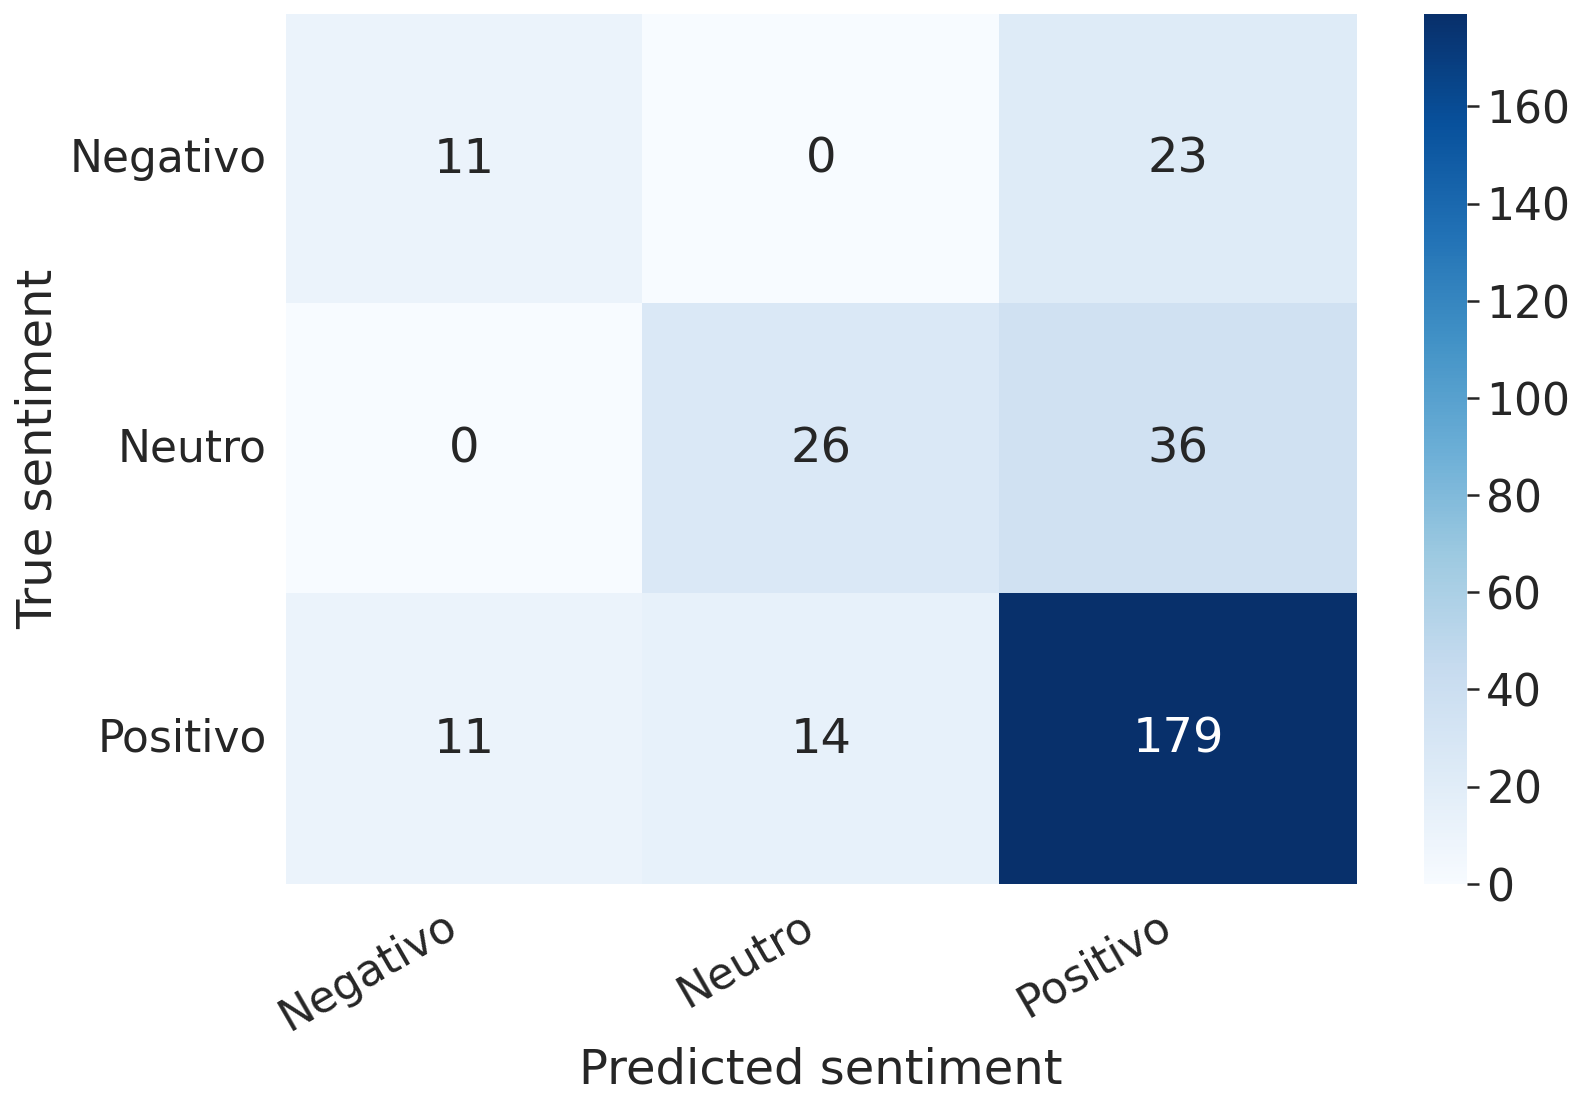

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

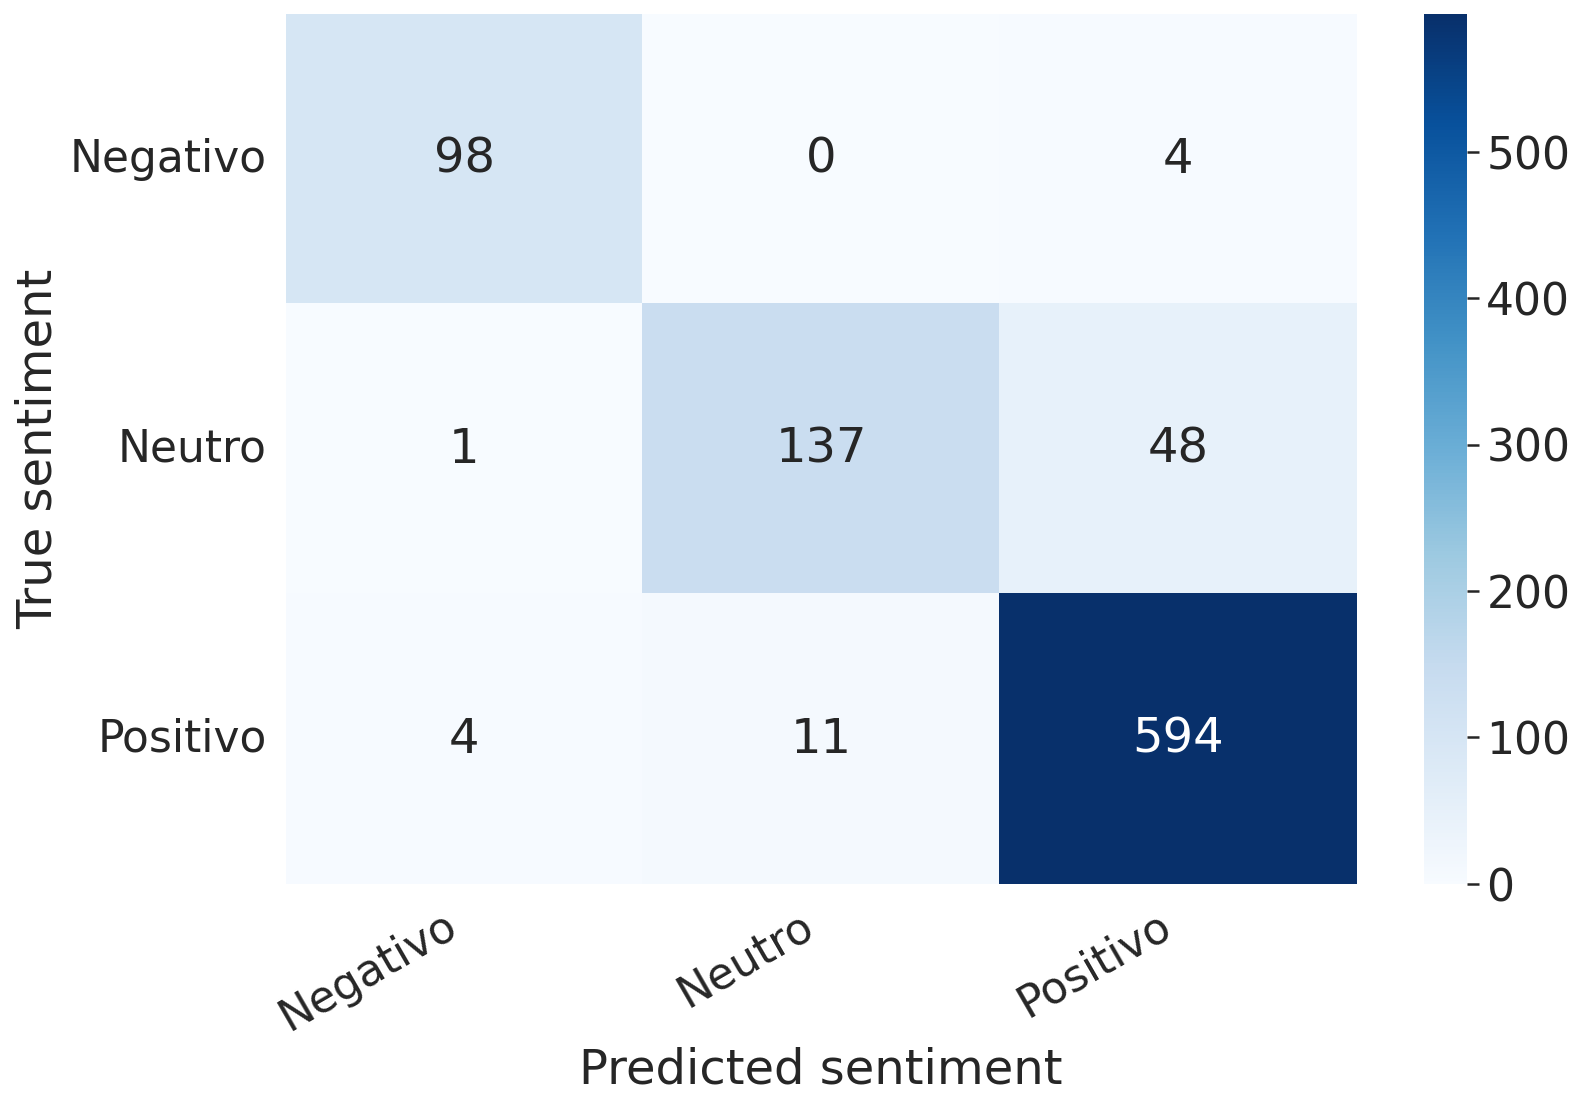

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_train, y_pred_train)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

Isso confirma que nosso modelo está tendo dificuldade em classificar avaliações neutras. Ele confunde aqueles com negativo e positivo em uma frequência aproximadamente igual.

Essa é uma boa visão geral do desempenho do nosso modelo. Mas vamos dar uma olhada em um exemplo de nossos dados de teste:

In [ ]:
idx = 10

comment_text = y_comment_texts[idx]
true_sentiment = y_test[idx]
pred_df_test = pd.DataFrame({
  'class_names': class_names,
  'values': y_pred_probs[idx]
})

In [ ]:
print("\n".join(wrap(comment_text)))
print()
print(f'True sentiment: {class_names[true_sentiment]}')
print(f'Sentiment: {true_sentiment}')
print(pd.DataFrame(y_pred_probs[idx], class_names)[0])

vamos todos juntos amor vai vencer odio

True sentiment: Positivo
Sentiment: 2
Negativo    0.004607
Neutro      0.011675
Positivo    0.983718
Name: 0, dtype: float32


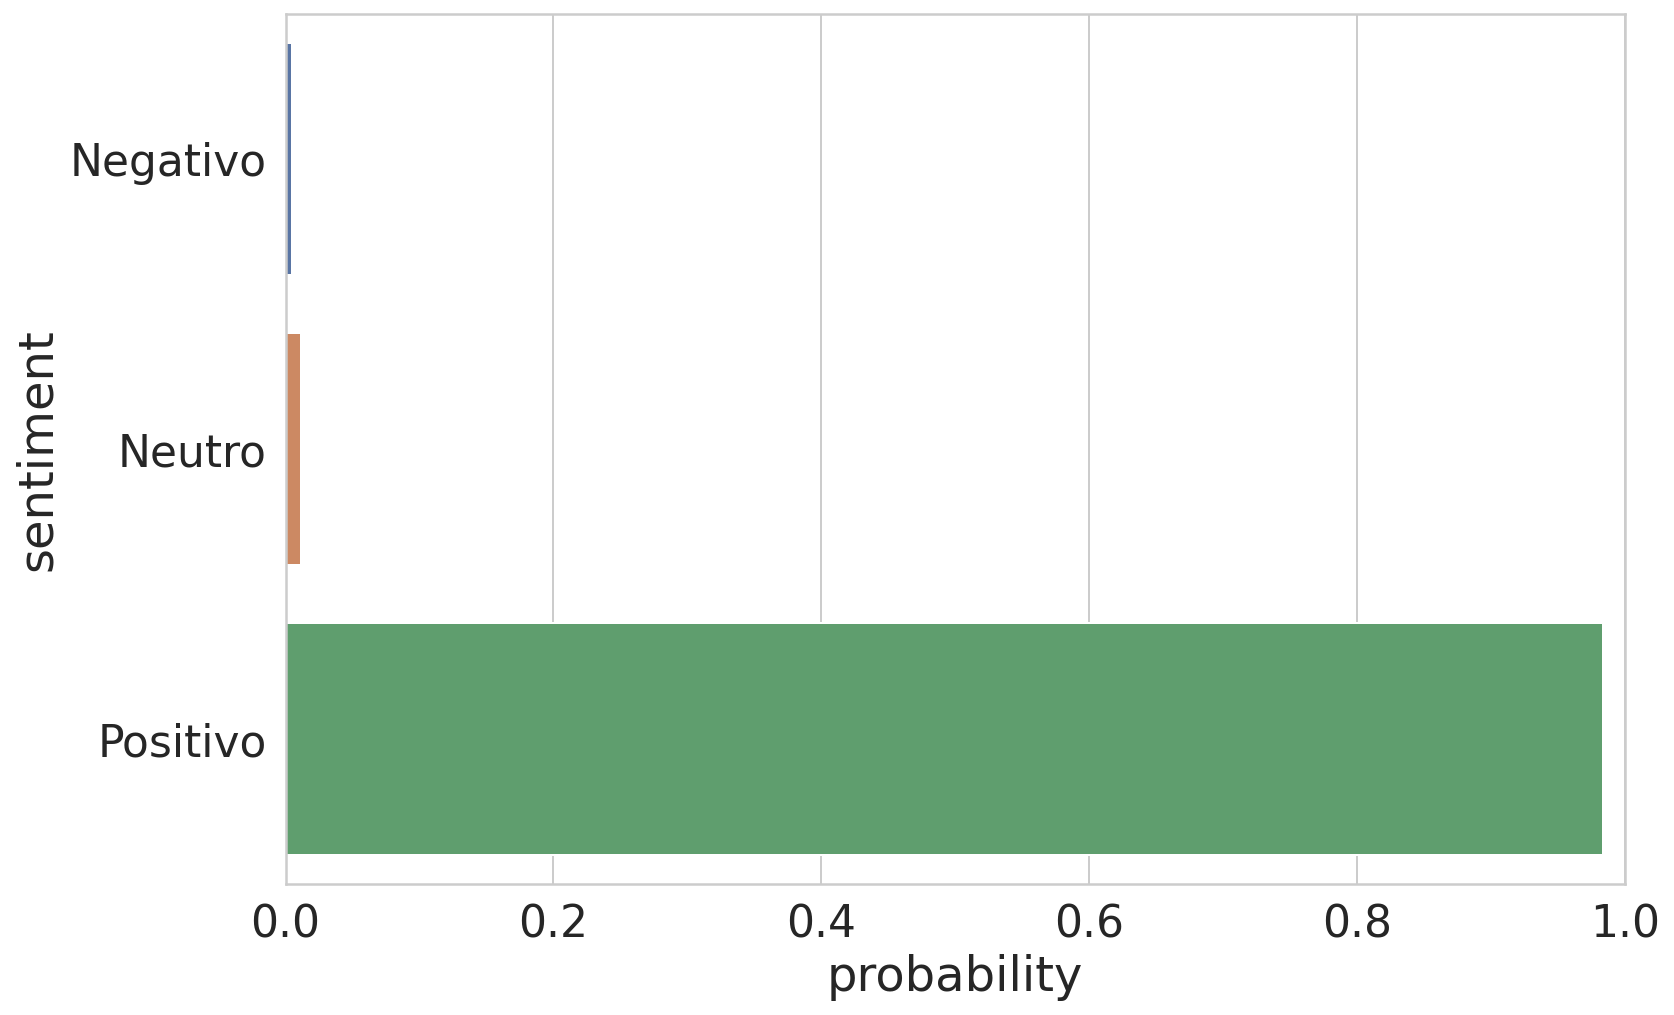

In [ ]:
sns.barplot(x='values', y='class_names', data=pred_df_test, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1]);

In [ ]:
idx = 11

comment_text = y_comment_train[idx]
true_sentiment = y_pred_train[idx]
pred_df_treino = pd.DataFrame({
  'class_names': class_names,
  'values': y_train_pred_probs[idx]
})

In [ ]:
print("\n".join(wrap(comment_text)))
print()
print(f'True sentiment: {class_names[true_sentiment]}')
print(f'Sentiment: {true_sentiment}')
print(pd.DataFrame(y_train_pred_probs[idx], class_names)[0])

vou votar lula meta eleger presidente primeiro turno lula presidente
sigo todosestou lula sdv

True sentiment: Positivo
Sentiment: 2
Negativo    0.002576
Neutro      0.022868
Positivo    0.974556
Name: 0, dtype: float32


Agora podemos ver a confiança de cada sentimento do nosso modelo:

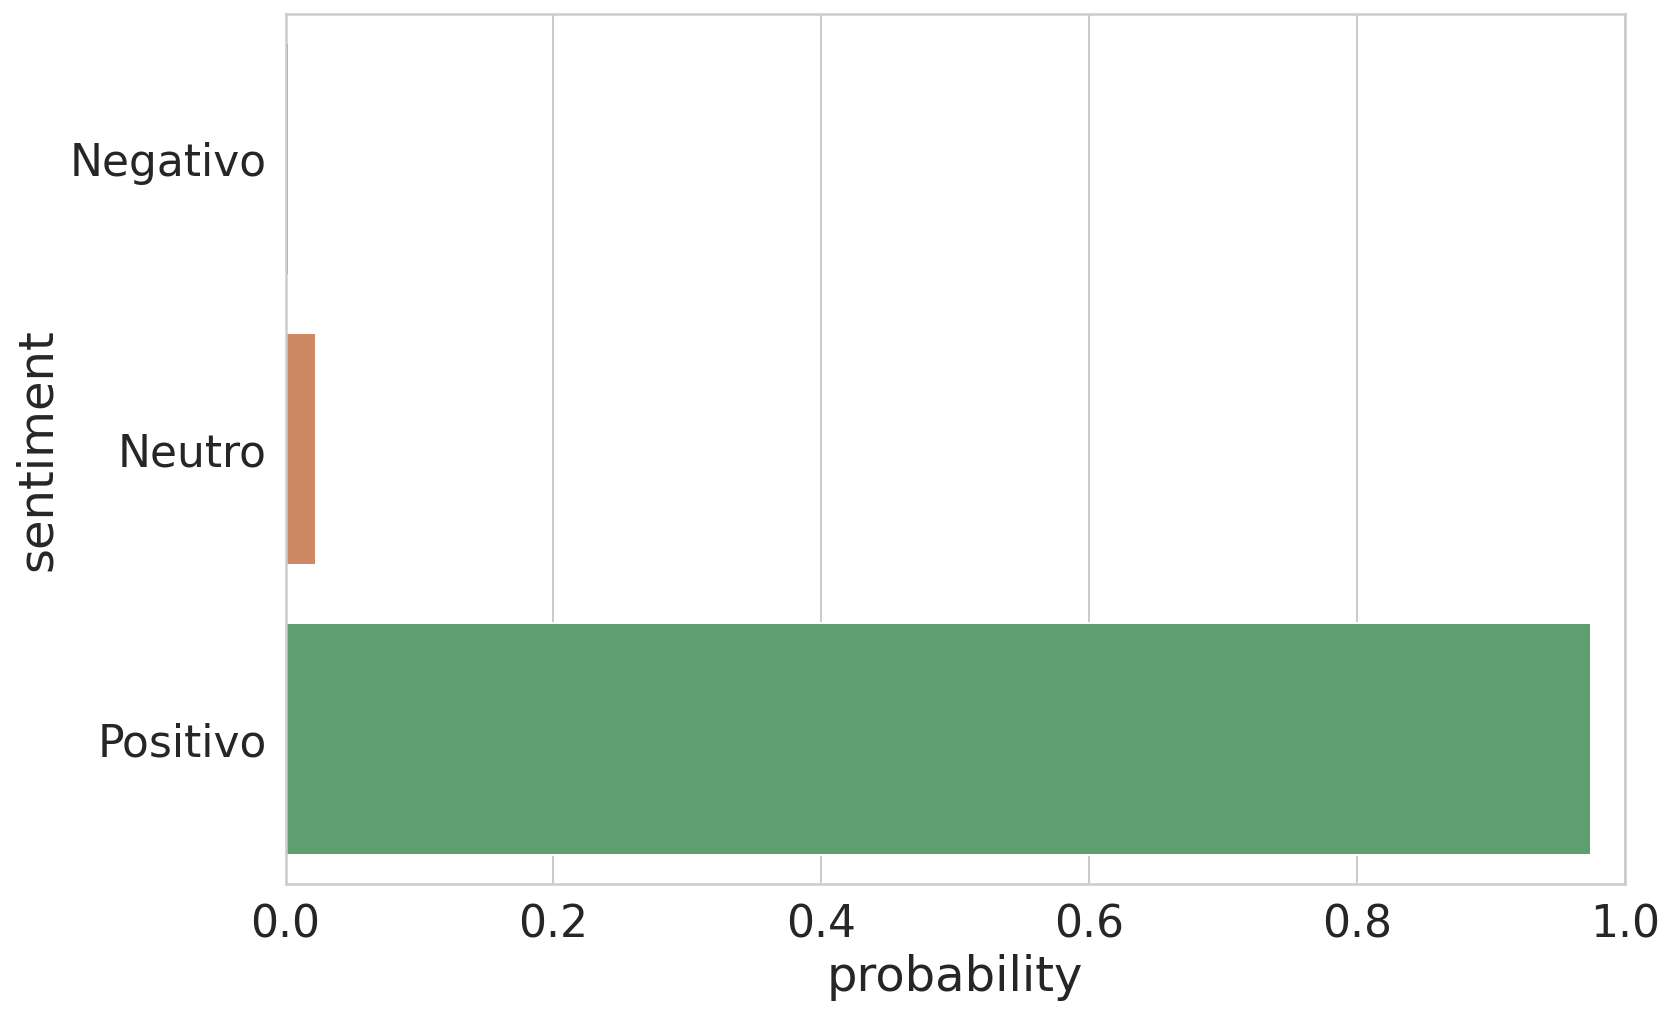

In [ ]:
sns.barplot(x='values', y='class_names', data=pred_df_treino, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1]);

### Previsão em texto bruto

Vamos usar nosso modelo para prever o sentimento de algum texto bruto:

Temos que usar o tokenizer para codificar o texto:

In [ ]:
comment_text = "proximas eleicoes 2022"

In [ ]:
encoded_comment = tokenizer.encode_plus(
  comment_text,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

Vamos obter as previsões do nosso modelo:

In [ ]:
input_ids = encoded_comment['input_ids'].to(device)
attention_mask = encoded_comment['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {comment_text}')
print(f'Sentiment  : {class_names[prediction]}')
print(f'Sentiment: {true_sentiment}')

Review text: proximas eleicoes 2022
Sentiment  : Positivo
Sentiment: 2


### Preditando um text!

In [ ]:


review_text = "I love completing my todos! Best app ever!!!"

#We have to use the tokenizer to encode the text:

encoded_review = tokenizer.encode_plus(
  review_text,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

#Let's get the predictions from our model:

input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)
probs = F.softmax(output, dim=1)

print(f'Review text: {review_text}')
print(pd.DataFrame(probs.tolist()[0], class_names)[0])
print(f'Sentiment  : {class_names[prediction]}')
print(f'Sentiment: {true_sentiment}')

Review text: I love completing my todos! Best app ever!!!
Negativo    0.011951
Neutro      0.532710
Positivo    0.455338
Name: 0, dtype: float64
Sentiment  : Neutro
Sentiment: 2


In [ ]:
tests = ["Eu gostaria de fazer uma avaliação sincera aqui e ver se o modelo vai identificar",
          "o brasil vai melhorar",
         "os governantes sao corruptos",
         "A republica esta uma zona"
         ]

In [ ]:
for test in tests:
  encoded_review = tokenizer.encode_plus(
    test,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',
  )

  input_ids = encoded_review['input_ids'].to(device)
  attention_mask = encoded_review['attention_mask'].to(device)

  output = model(input_ids, attention_mask)
  _, prediction = torch.max(output, dim=1)
  probs = F.softmax(output, dim=1)

  print(f'Review text: {test}')
  print(pd.DataFrame(probs.tolist()[0], class_names)[0])
  print(f'Sentiment  : {class_names[prediction]}')
  print(f'Sentiment: {true_sentiment}')
  print("========================\n")

Review text: Eu gostaria de fazer uma avaliação sincera aqui e ver se o modelo vai identificar
Negativo    0.011909
Neutro      0.070727
Positivo    0.917364
Name: 0, dtype: float64
Sentiment  : Positivo
Sentiment: 2

Review text: o brasil vai melhorar
Negativo    0.006053
Neutro      0.011264
Positivo    0.982683
Name: 0, dtype: float64
Sentiment  : Positivo
Sentiment: 2

Review text: os governantes sao corruptos
Negativo    0.364187
Neutro      0.030737
Positivo    0.605076
Name: 0, dtype: float64
Sentiment  : Positivo
Sentiment: 2

Review text: A republica esta uma zona
Negativo    0.008246
Neutro      0.071770
Positivo    0.919985
Name: 0, dtype: float64
Sentiment  : Positivo
Sentiment: 2

